In [113]:
library(readxl)
library(ggplot2)
library("FactoMineR")
library(tidyverse) #data Manipulation
library(cluster) #Clustering algorithms
library(factoextra)#Clustering Algorithms & Visualization
library(gridExtra)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
library("np") #npreg: you may need to install it
library(PerformanceAnalytics)
library(psych)
#install.packages('fmsb')
library(fmsb) #For Spider Plots
#install.packages('countrycode')
library(countrycode)
#install.packages(c('hrbrthemes','viridis'))
#library(hrbrthemes)
#library(viridis)
#install.packages('GGally')
library(GGally)
library(dplyr)
library(ggmap)
library(leaflet)
library(htmltools)
library(dplyr) #getMap()
library(rgeos)
#install.packages('rworldmap')
library(rworldmap) #joinCountryData2Map
library(grid)
library(tidyr)
#install.packages(c("cowplot", "googleway", "ggplot2", "ggrepel", "ggspatial", "sf", "rnaturalearth", "rnaturalearthdata"))
library("sf")
library("rnaturalearth")
library("rnaturalearthdata")
#install.packages('writexl')
library(writexl)

In [177]:
df.water.access <- read_excel("../../results/df-water-access.xlsx",sheet=1)
dfsimple <- read_excel("../../results/dfsimple.xlsx",sheet=1)
df.wa <- df.water.access[,c(1:18)]

   Country               phom            pipy            ptap      
 Length:73          Min.   : 0.00   Min.   : 0.00   Min.   : 0.00  
 Class :character   1st Qu.: 2.70   1st Qu.: 3.30   1st Qu.: 3.00  
 Mode  :character   Median : 8.30   Median : 6.60   Median :10.30  
                    Mean   :18.31   Mean   :11.59   Mean   :12.01  
                    3rd Qu.:25.40   3rd Qu.:19.70   3rd Qu.:17.70  
                    Max.   :90.60   Max.   :54.10   Max.   :57.70  
      bore            pwel             pspr             rain       
 Min.   : 0.00   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 0.60   1st Qu.: 1.500   1st Qu.: 0.100   1st Qu.: 0.000  
 Median : 5.70   Median : 4.100   Median : 0.800   Median : 0.300  
 Mean   :13.43   Mean   : 6.747   Mean   : 3.342   Mean   : 2.742  
 3rd Qu.:22.90   3rd Qu.: 9.000   3rd Qu.: 4.200   3rd Qu.: 1.700  
 Max.   :86.40   Max.   :48.100   Max.   :47.900   Max.   :46.700  
      uwel             uspr             truc    

Country,phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3
Albania,48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9
Angola,4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5
Armenia,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6
Azerbaijan,34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9
Bangladesh,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5


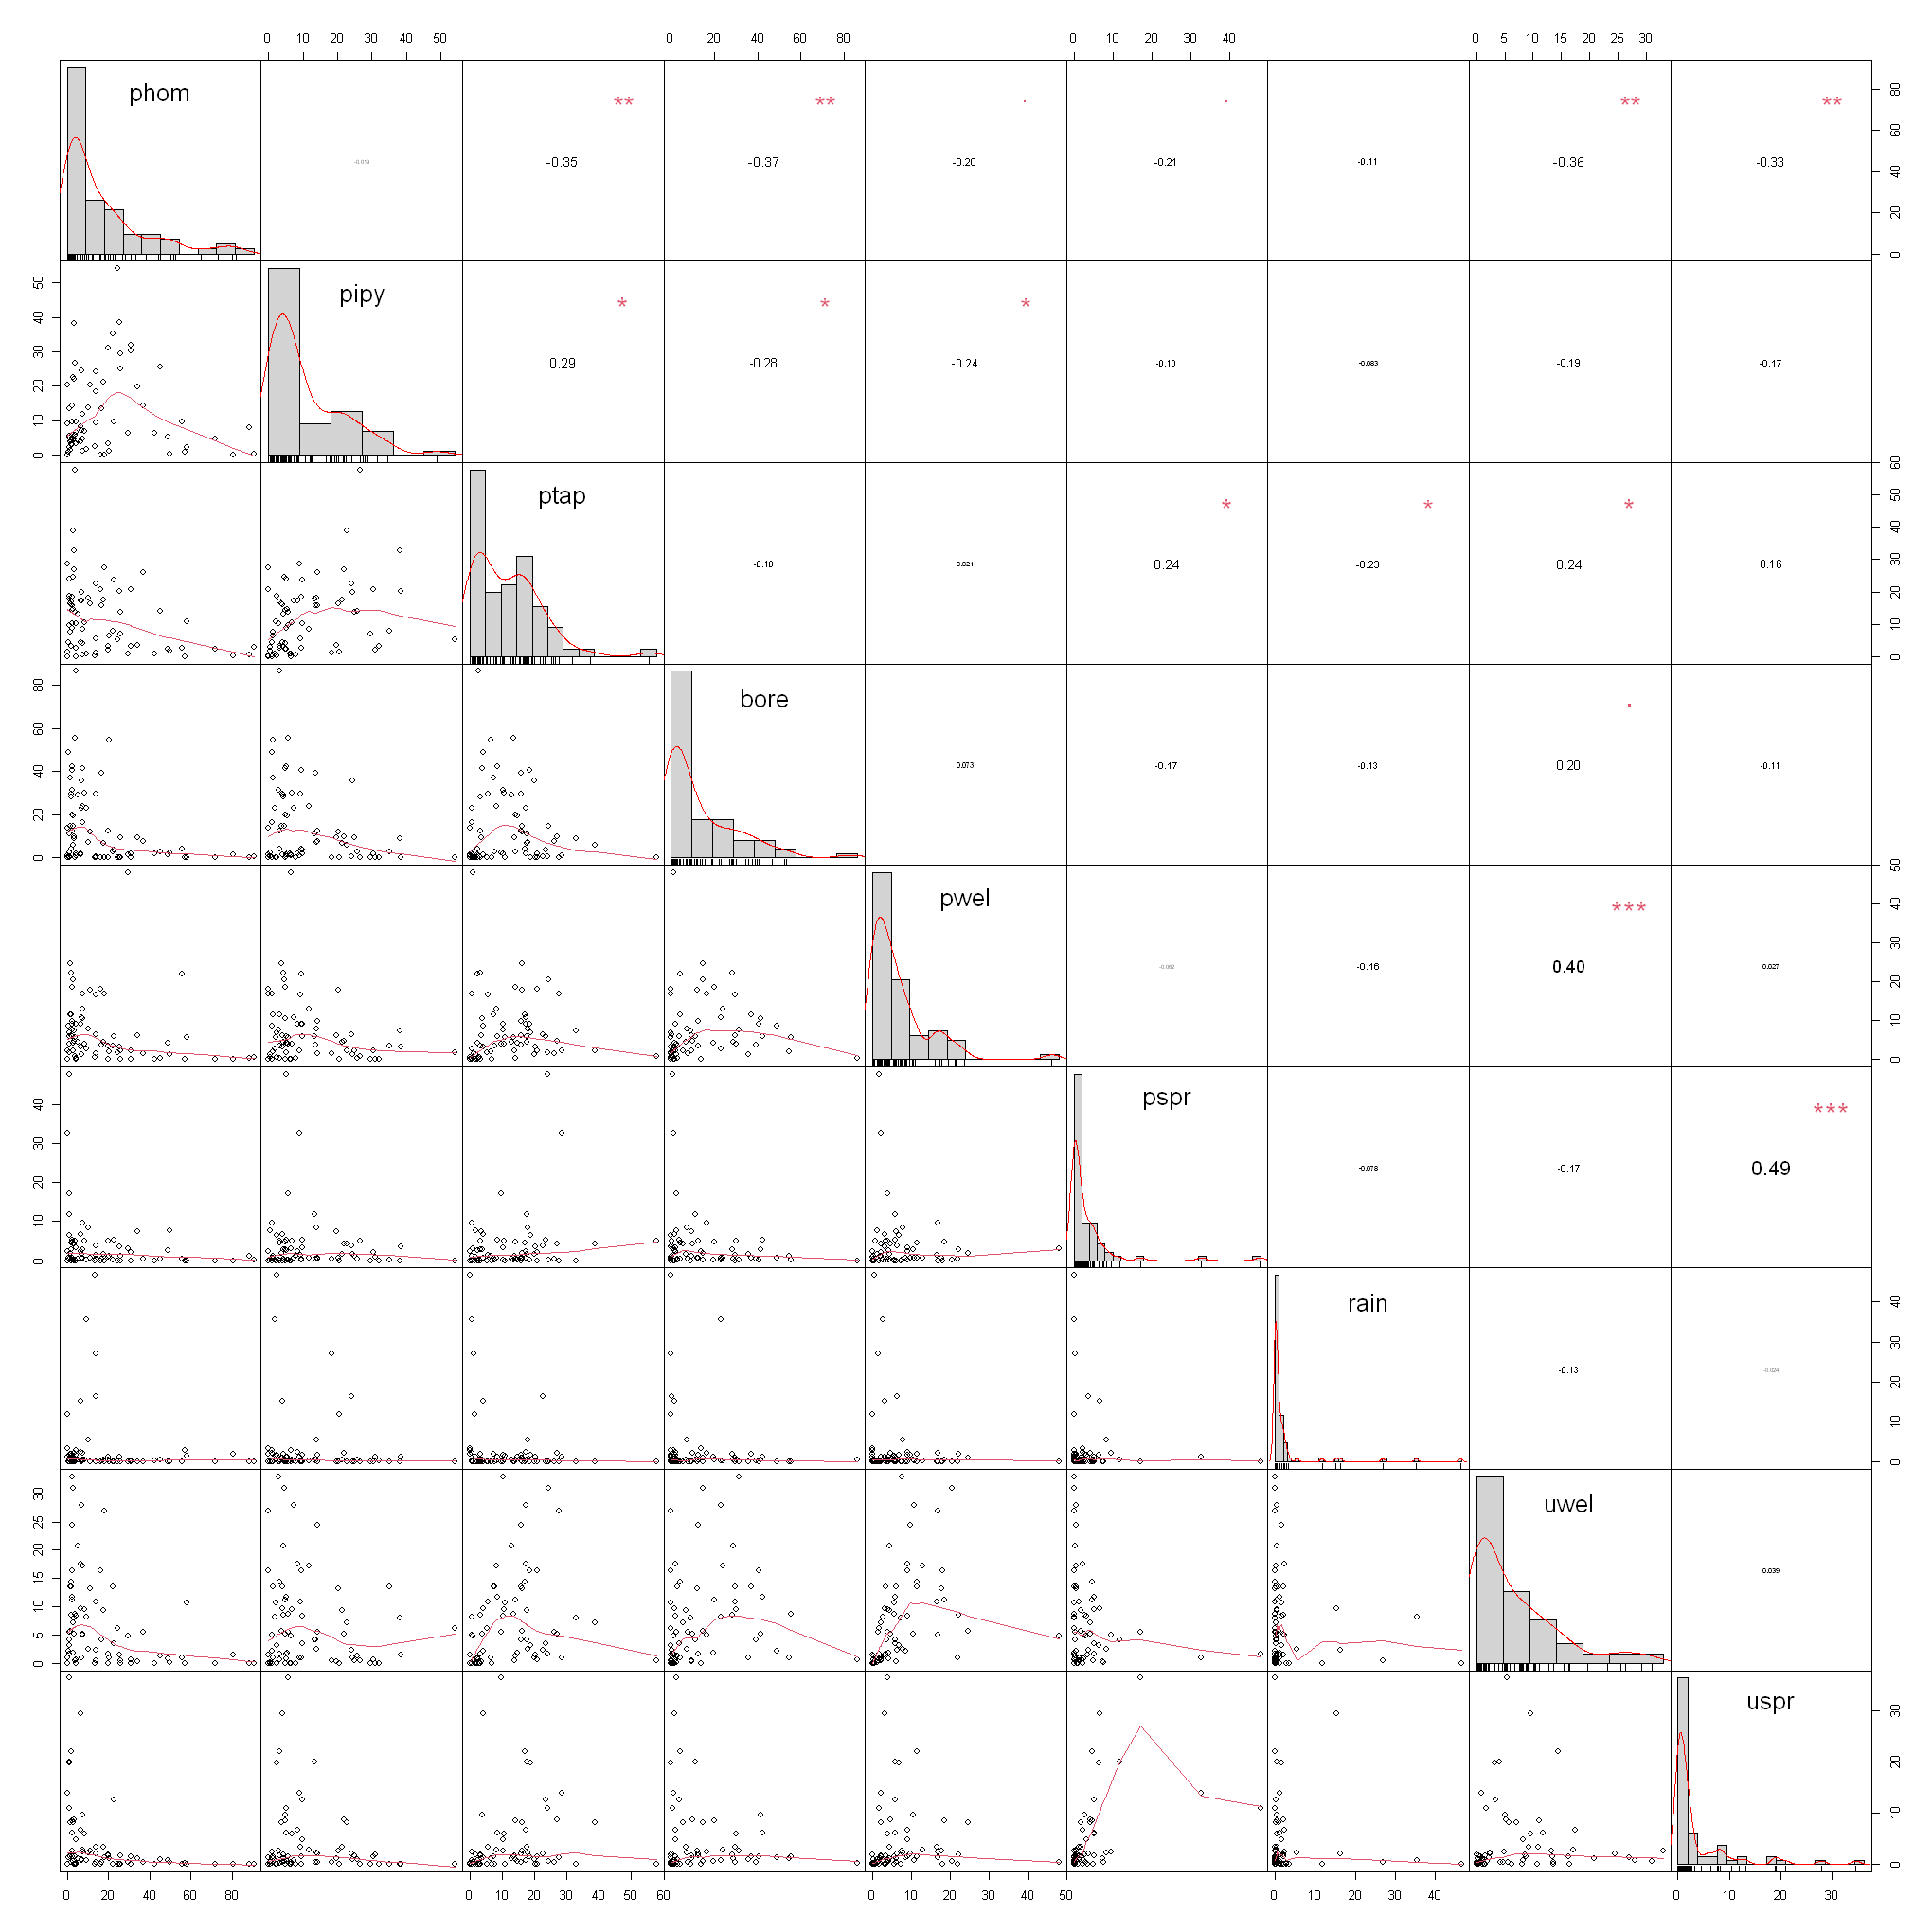

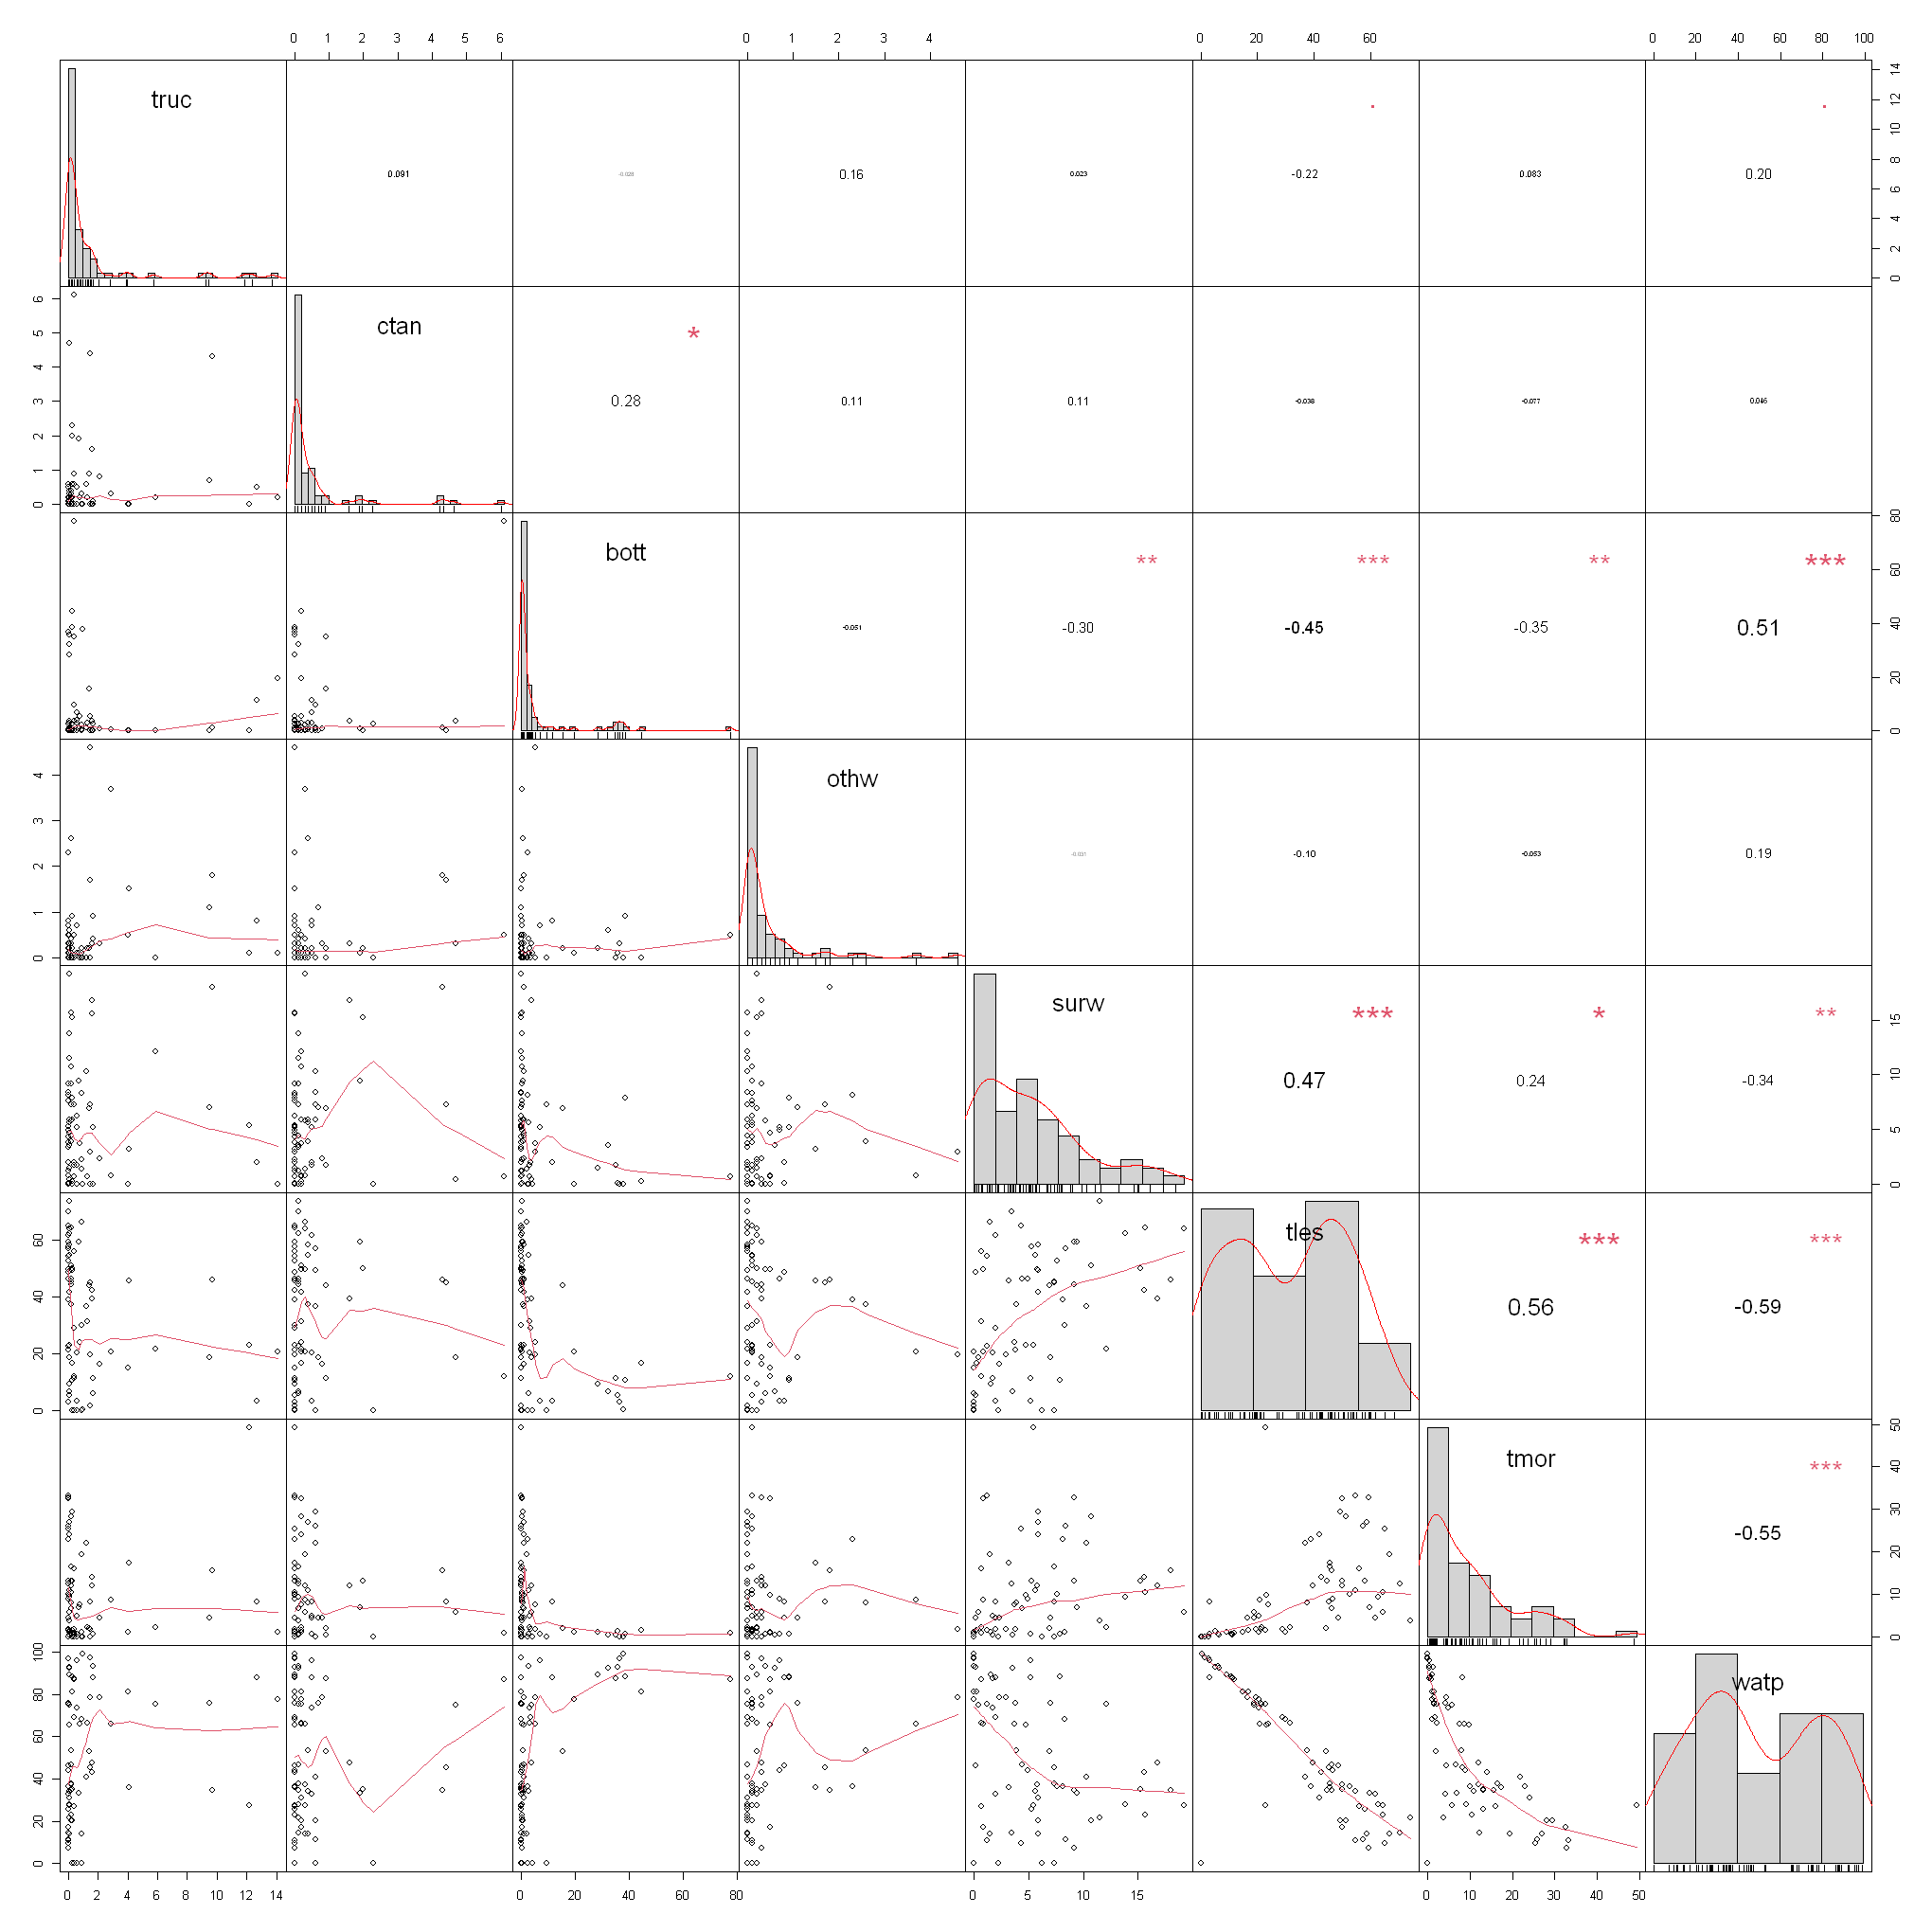

In [178]:
summary(df.wa)
head(df.wa)
chart.Correlation(df.wa[,2:10], histogram=TRUE, pch=19 , tl.cex = .7 )
chart.Correlation(df.wa[,11:18], histogram=TRUE, pch=19 , tl.cex = .7 )

# Spider Plots of the variables

In [179]:
# Create data: Water Accessibility Aggregate
df.wa <- df.wa[,c(2:18)]
head(df.wa)
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,1:18]
df.wa.aggregate

phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3
48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9
4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5
88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6
34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9
4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5


clusters,phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.110811,9.089189,17.021622,17.48919,9.356757,4.975676,1.159459,11.545946,6.786486,1.018919,0.5486486,1.027027,0.3378378,7.740541,51.96757,16.762162,29.84595
2,66.212500,3.262500,1.350000,0.95000,0.762500,1.400000,0.637500,0.287500,0.187500,2.600000,0.1000000,18.362500,0.8500000,2.012500,8.45000,0.787500,90.48750
3,20.230435,19.278261,9.552174,12.93478,2.691304,1.956522,4.491304,2.126087,1.304348,1.934783,0.6913043,12.547826,0.5608696,2.930435,18.40435,3.473913,77.23913
4,30.560000,8.080000,3.280000,5.66000,15.660000,0.740000,9.780000,4.940000,0.260000,0.560000,0.5800000,3.360000,0.0800000,3.140000,0.00000,0.000000,0.00000


# Extract table of cluster centroids.

[1]  70.23646 114.07569  87.02403  38.02239

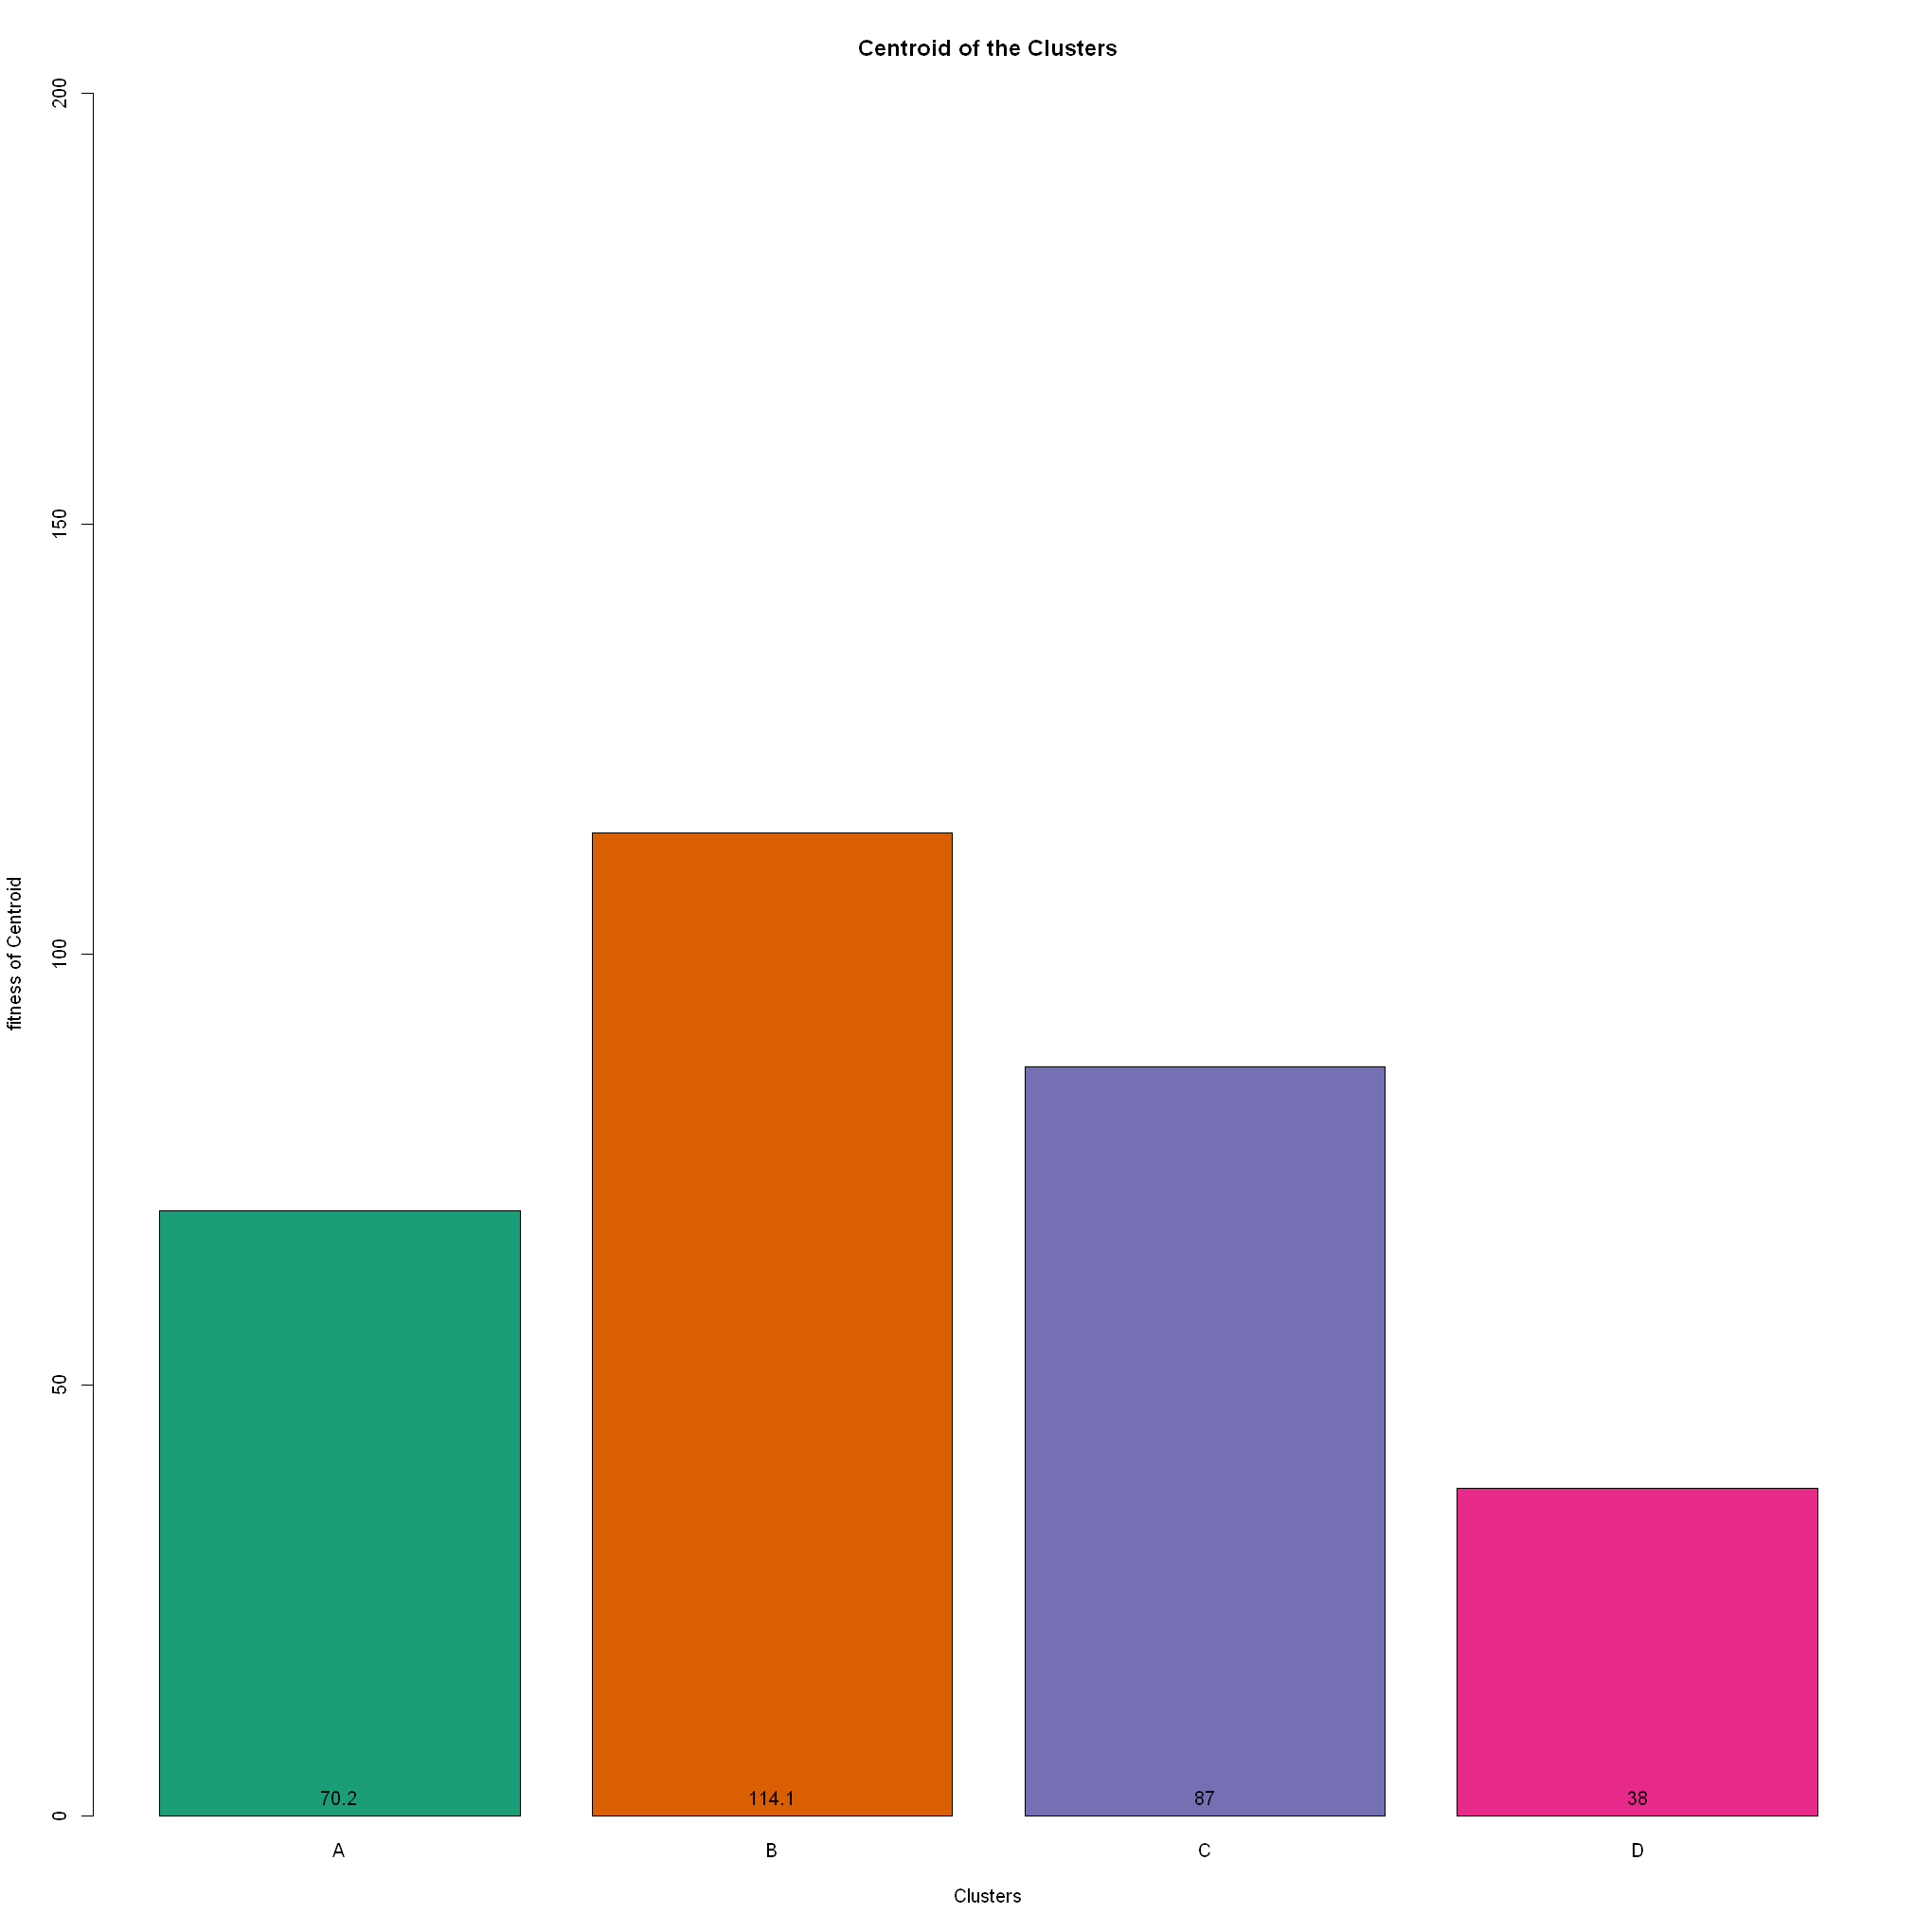

ERROR: Error in x^2: non-numeric argument to binary operator


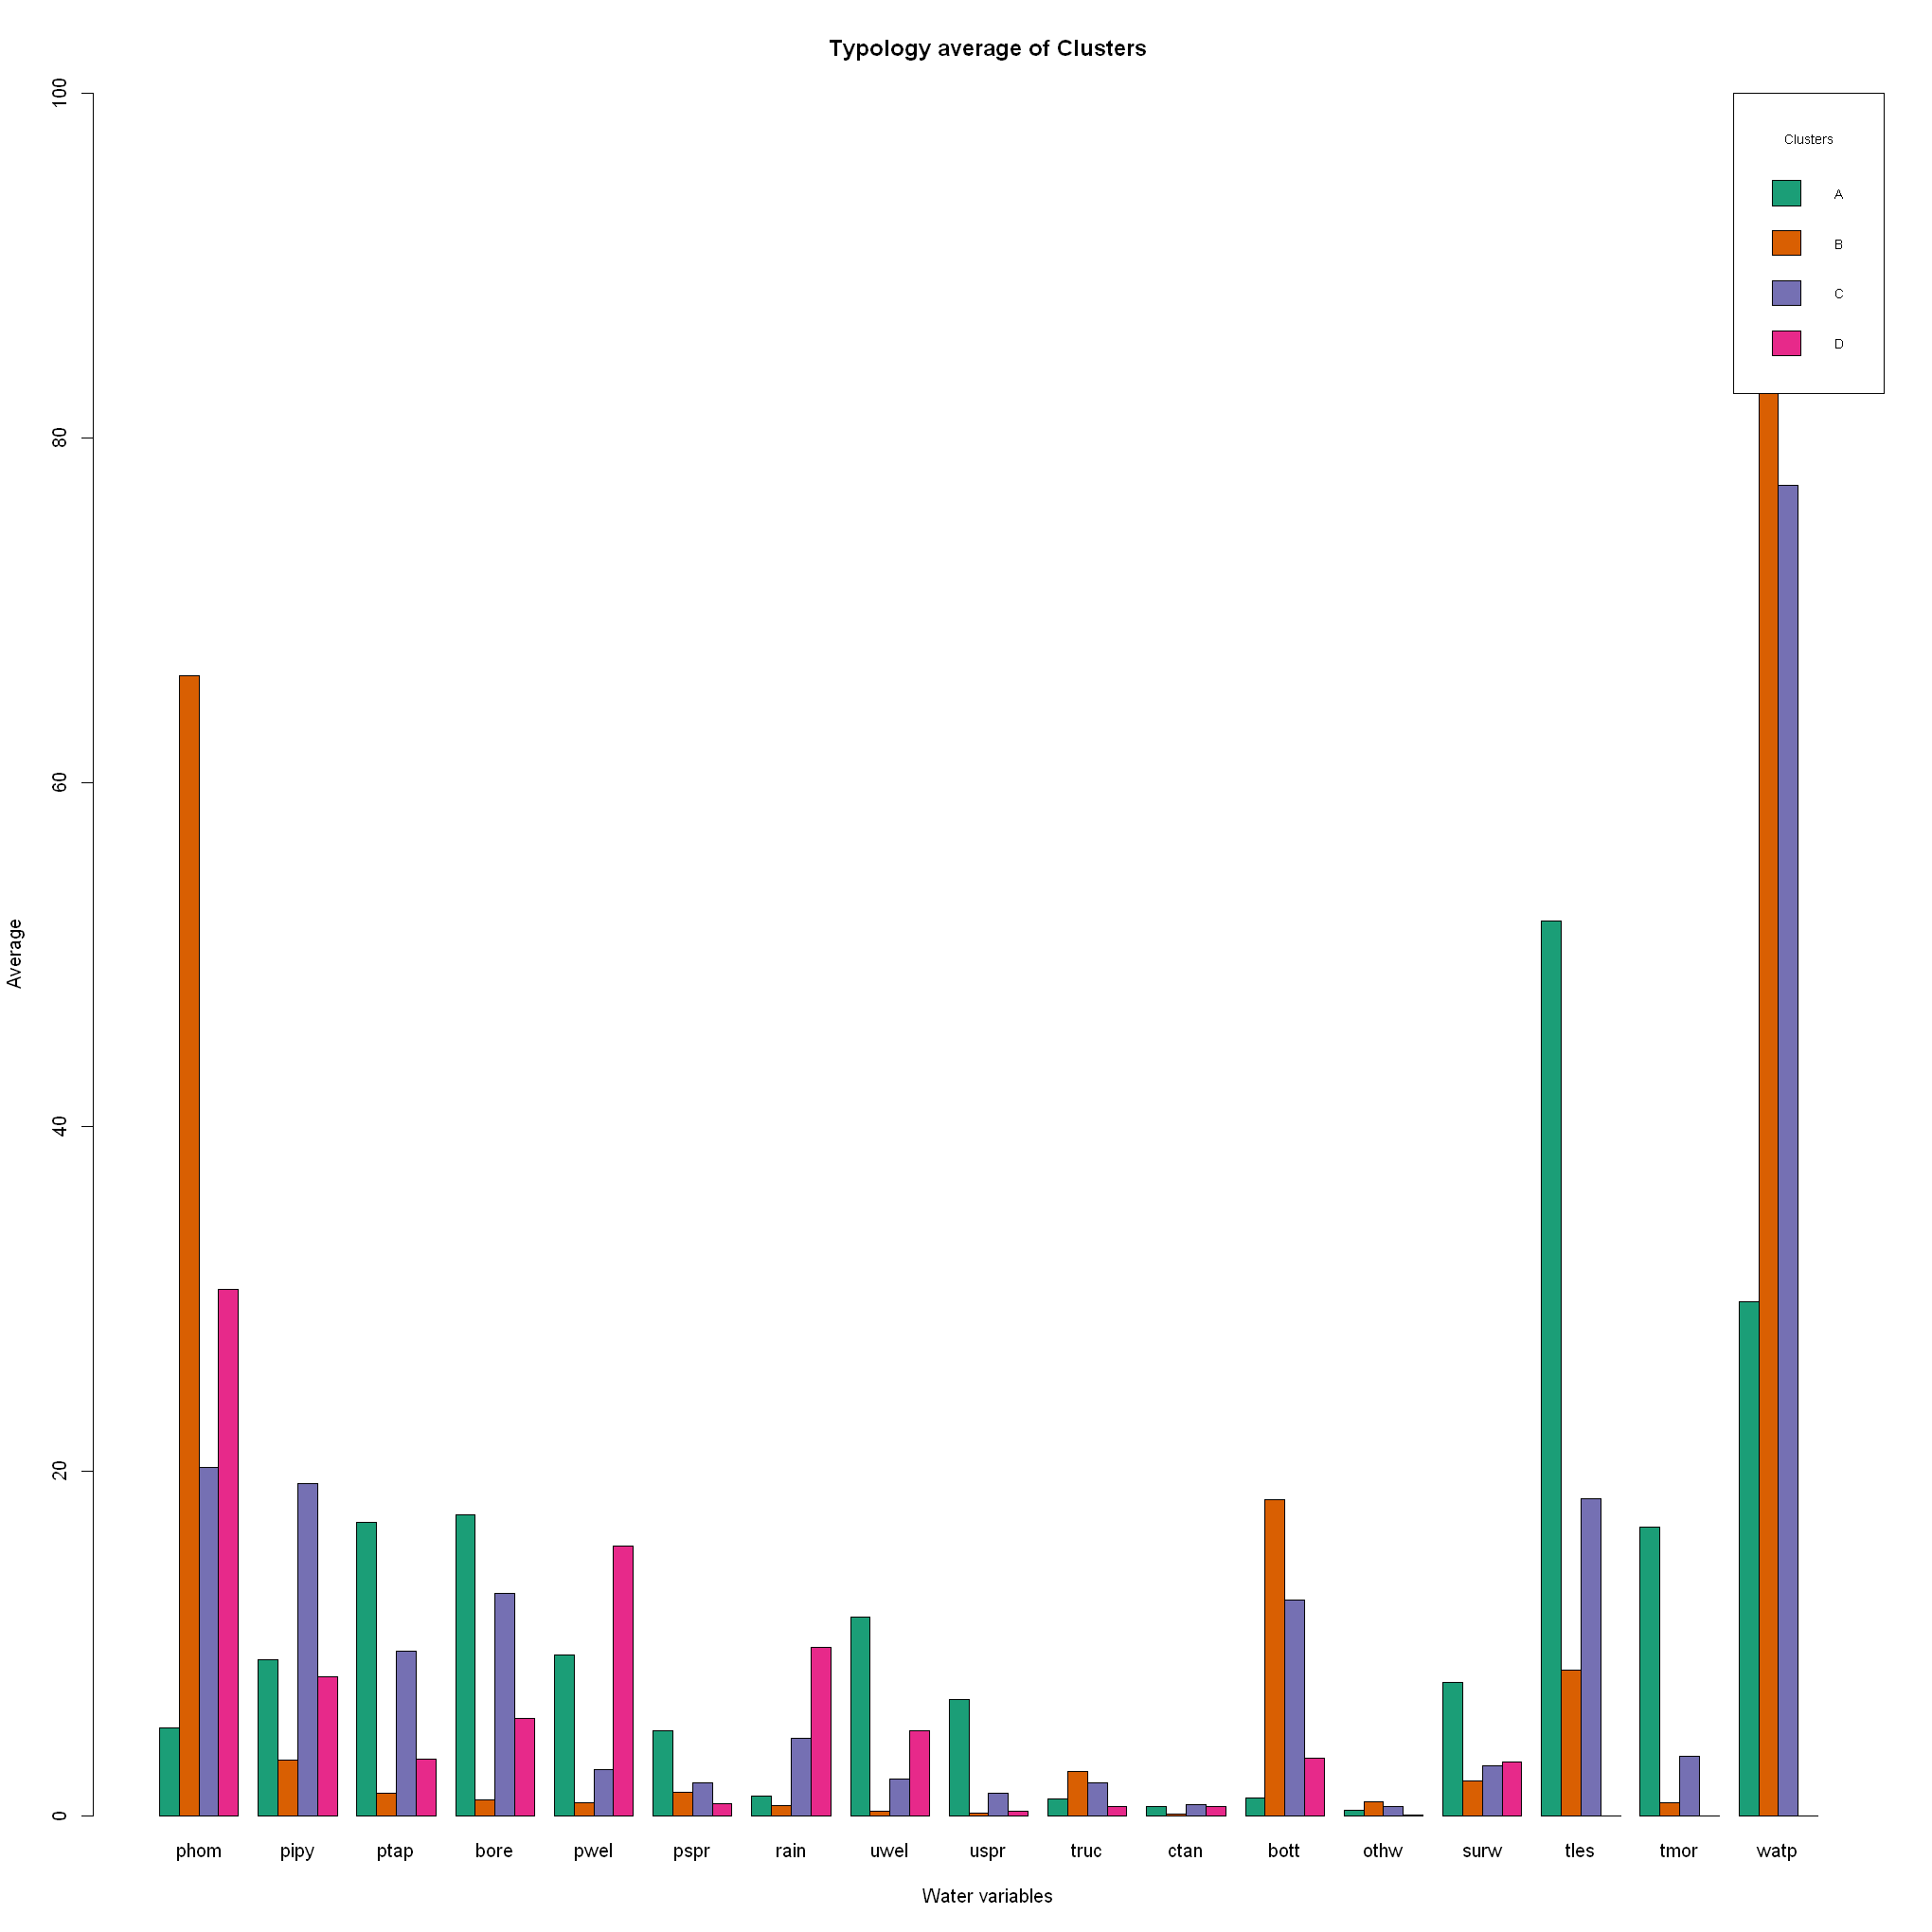

In [223]:
centroid <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the centroid of the cluster
centroid
old.par <- par(mar = c(0, 0, 0, 0))
par(old.par)

bp <- barplot(centroid,
        main = "Centroid of the Clusters", xlab = "Clusters", ylab = "fitness of Centroid",
        col = c("#1B9E77" ,"#D95F02" ,"#7570B3" ,"#E7298A"),
        ylim = c(0, 200), names.arg = c("A", "B", "C","D"))
text(bp, 0, round(centroid, 1),cex=1,pos=3)
options(repr.plot.width=17, repr.plot.height=17)
barplot(as.matrix(df.wa.aggregate[,c(2:18)]),
        beside = TRUE,
        main = "Typology average of Clusters", xlab = "Water variables", ylab = "Average",
        col = c("#1B9E77" ,"#D95F02" ,"#7570B3" ,"#E7298A"),
        legend = c("A", "B", "C","D"), 
        args.legend = list(title = "Clusters", x = "topright", cex = .7), ylim = c(0, 100))
                  


centroiddf.wa <- apply(df.wa, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster
head(centroiddf.wa)


In [181]:
centroiddf.wa
str(centroiddf.wa)

[1]  73.72822  97.55788  66.41446 131.88180  89.49631 117.14064  74.57003
 [8] 107.24766  79.18965  89.41393  45.84583  74.83415  80.03487 125.85126
[15]  80.61774  70.03613  80.73333  75.18710 117.71720 130.20058  72.10888
[22]  73.01212  71.75667  86.67503  85.21033  70.91255 101.40784  73.36062
[29] 104.59359  76.52542 106.38308  87.63789  98.70714 120.71131  71.50902
[36]  89.12637  79.46408  92.52589  80.22182  93.33124 114.41084  82.11455
[43]  76.08173  57.25181  60.53867  68.80865  80.27596  81.60741  89.25962
[50]  90.88168  80.01187  81.03721  96.64988  73.77547 108.60796  97.66857
[57]  80.93800  90.96043  89.60536  78.95258  96.78187  88.88217  66.90291
[64]  80.19208  79.57236 111.88025  91.89004  76.64868  60.89433  24.41680
[71]  91.07338  74.57808  73.50347

 num [1:73] 73.7 97.6 66.4 131.9 89.5 ...


# Radar Plot for the aggregated data

,phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000000,100.000000,100.0000000,100.000000,100.00000,100.000000,100.00000
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.00000,0.000000,0.00000
3,5.110811,9.089189,17.021622,17.48919,9.356757,4.975676,1.159459,11.545946,6.786486,1.018919,0.5486486,1.027027,0.3378378,7.740541,51.96757,16.762162,29.84595
4,66.212500,3.262500,1.350000,0.95000,0.762500,1.400000,0.637500,0.287500,0.187500,2.600000,0.1000000,18.362500,0.8500000,2.012500,8.45000,0.787500,90.48750
5,20.230435,19.278261,9.552174,12.93478,2.691304,1.956522,4.491304,2.126087,1.304348,1.934783,0.6913043,12.547826,0.5608696,2.930435,18.40435,3.473913,77.23913
6,30.560000,8.080000,3.280000,5.66000,15.660000,0.740000,9.780000,4.940000,0.260000,0.560000,0.5800000,3.360000,0.0800000,3.140000,0.00000,0.000000,0.00000


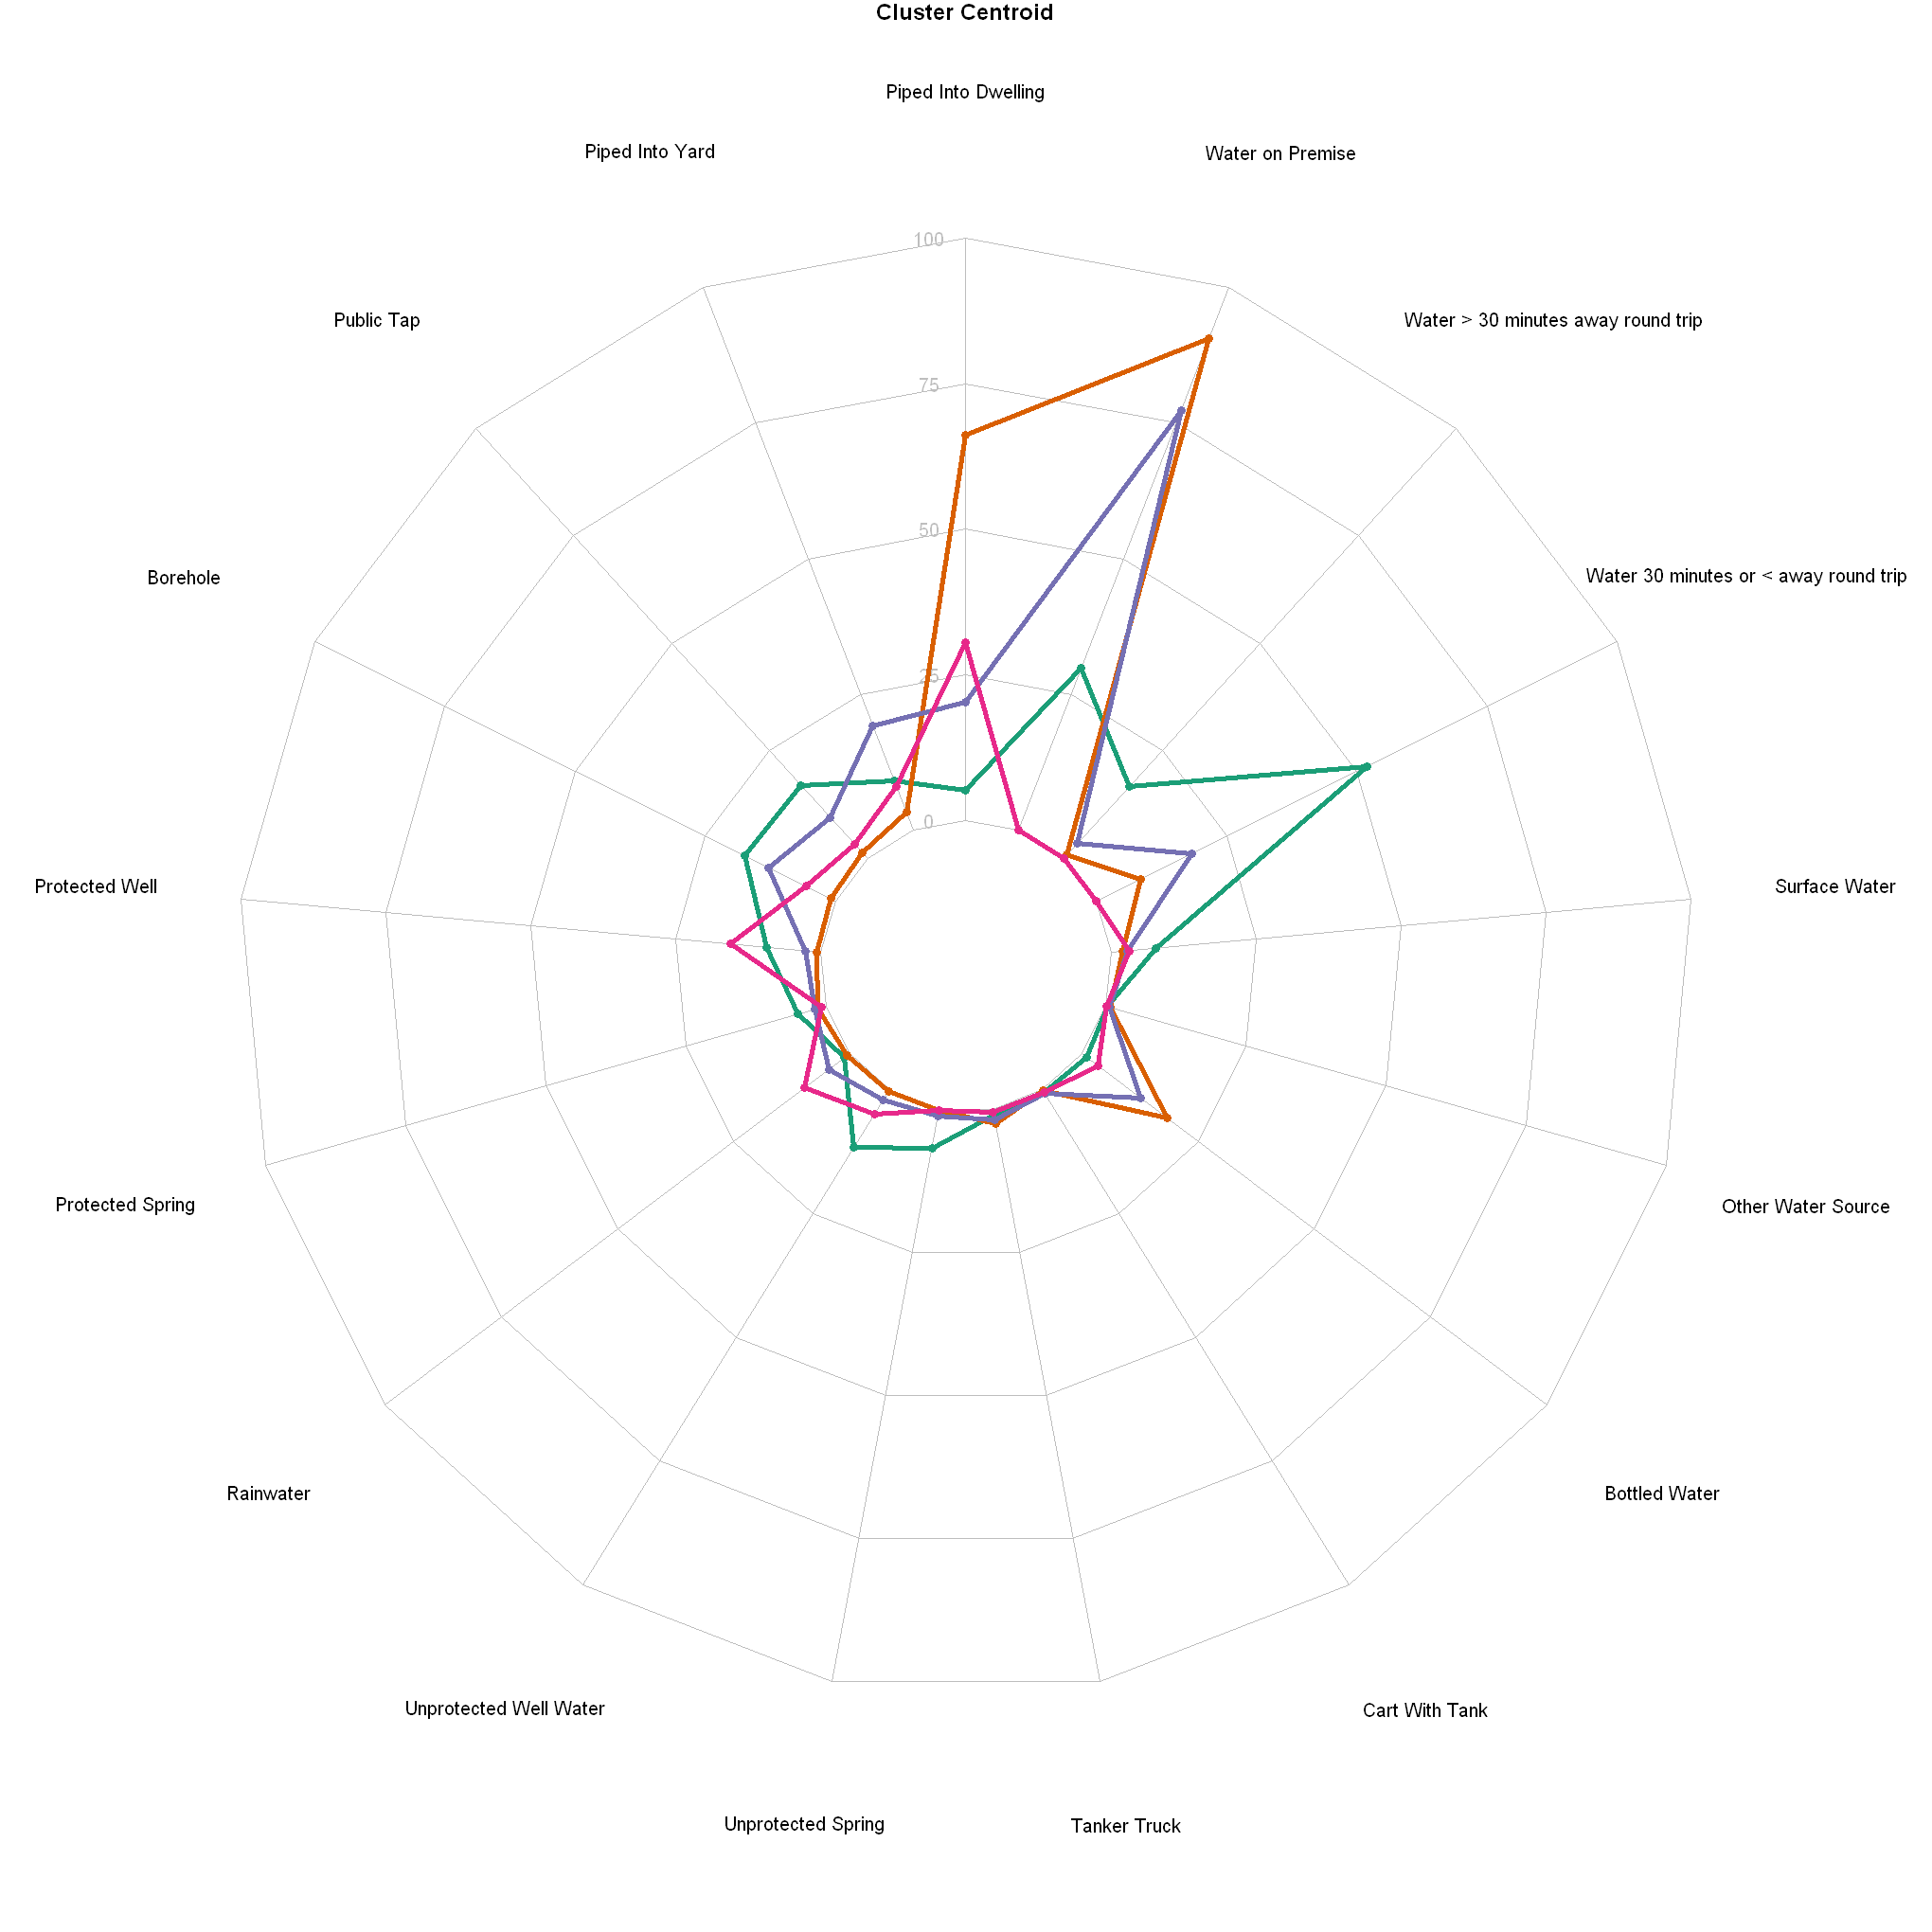

In [220]:
# To use the fmsb package, I have to add 2 lines to the data frame: the max and min of each topic to show on the plot!
#max.aggregate = apply(df.wa.aggregate,2,max)
#apply(df.wa.aggregate,2,min)
#max.aggregate
#norm.df.wa <- sweep(df.wa.aggregate, 2, max.aggregate, FUN = '/')

data.spider <- rbind(rep(100,50) , rep(0,10) , df.wa.aggregate[,c(2:18)])

head(data.spider,7)
colnames(data.spider) <- c(
                            
    "Piped Into Dwelling",
    'Piped Into Yard',
    "Public Tap" ,
    "Borehole" , 
     "Protected Well" ,
       "Protected Spring", 
    "Rainwater" ,
    
    "Unprotected Well Water", 
    "Unprotected Spring", 
    'Tanker Truck',
    'Cart With Tank',
    'Bottled Water',
    'Other Water Source',
    "Surface Water" ,
     "Water 30 minutes or < away round trip" , 
    "Water > 30 minutes away round trip" , 
    'Water on Premise')                       
options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1)

# The default radar chart for First Cluster
r.c. <- radarchart(data.spider,
           #custom polygon
           pcol= c("#1B9E77" ,"#D95F02" ,"#7570B3" ,"#E7298A") ,
           plwd=4 , plty=1,
           #custom the grid
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels= seq(0,100,25), cglwd=0.8, axistype = 4,
           title = 'Cluster Centroid',
           vlcex=1,
           calcex = 1 ,
                   
           )

# Box Plot of Water Accessibility Variables (Violin Plots)

phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.110811,9.089189,17.021622,17.48919,9.356757,4.975676,1.159459,11.545946,6.786486,1.018919,0.5486486,1.027027,0.3378378,7.740541,51.96757,16.762162,29.84595
66.212500,3.262500,1.350000,0.95000,0.762500,1.400000,0.637500,0.287500,0.187500,2.600000,0.1000000,18.362500,0.8500000,2.012500,8.45000,0.787500,90.48750
20.230435,19.278261,9.552174,12.93478,2.691304,1.956522,4.491304,2.126087,1.304348,1.934783,0.6913043,12.547826,0.5608696,2.930435,18.40435,3.473913,77.23913
30.560000,8.080000,3.280000,5.66000,15.660000,0.740000,9.780000,4.940000,0.260000,0.560000,0.5800000,3.360000,0.0800000,3.140000,0.00000,0.000000,0.00000


[1] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
 [9] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
[17] "factor"

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"position_dodge requires non-overlapping x intervals"


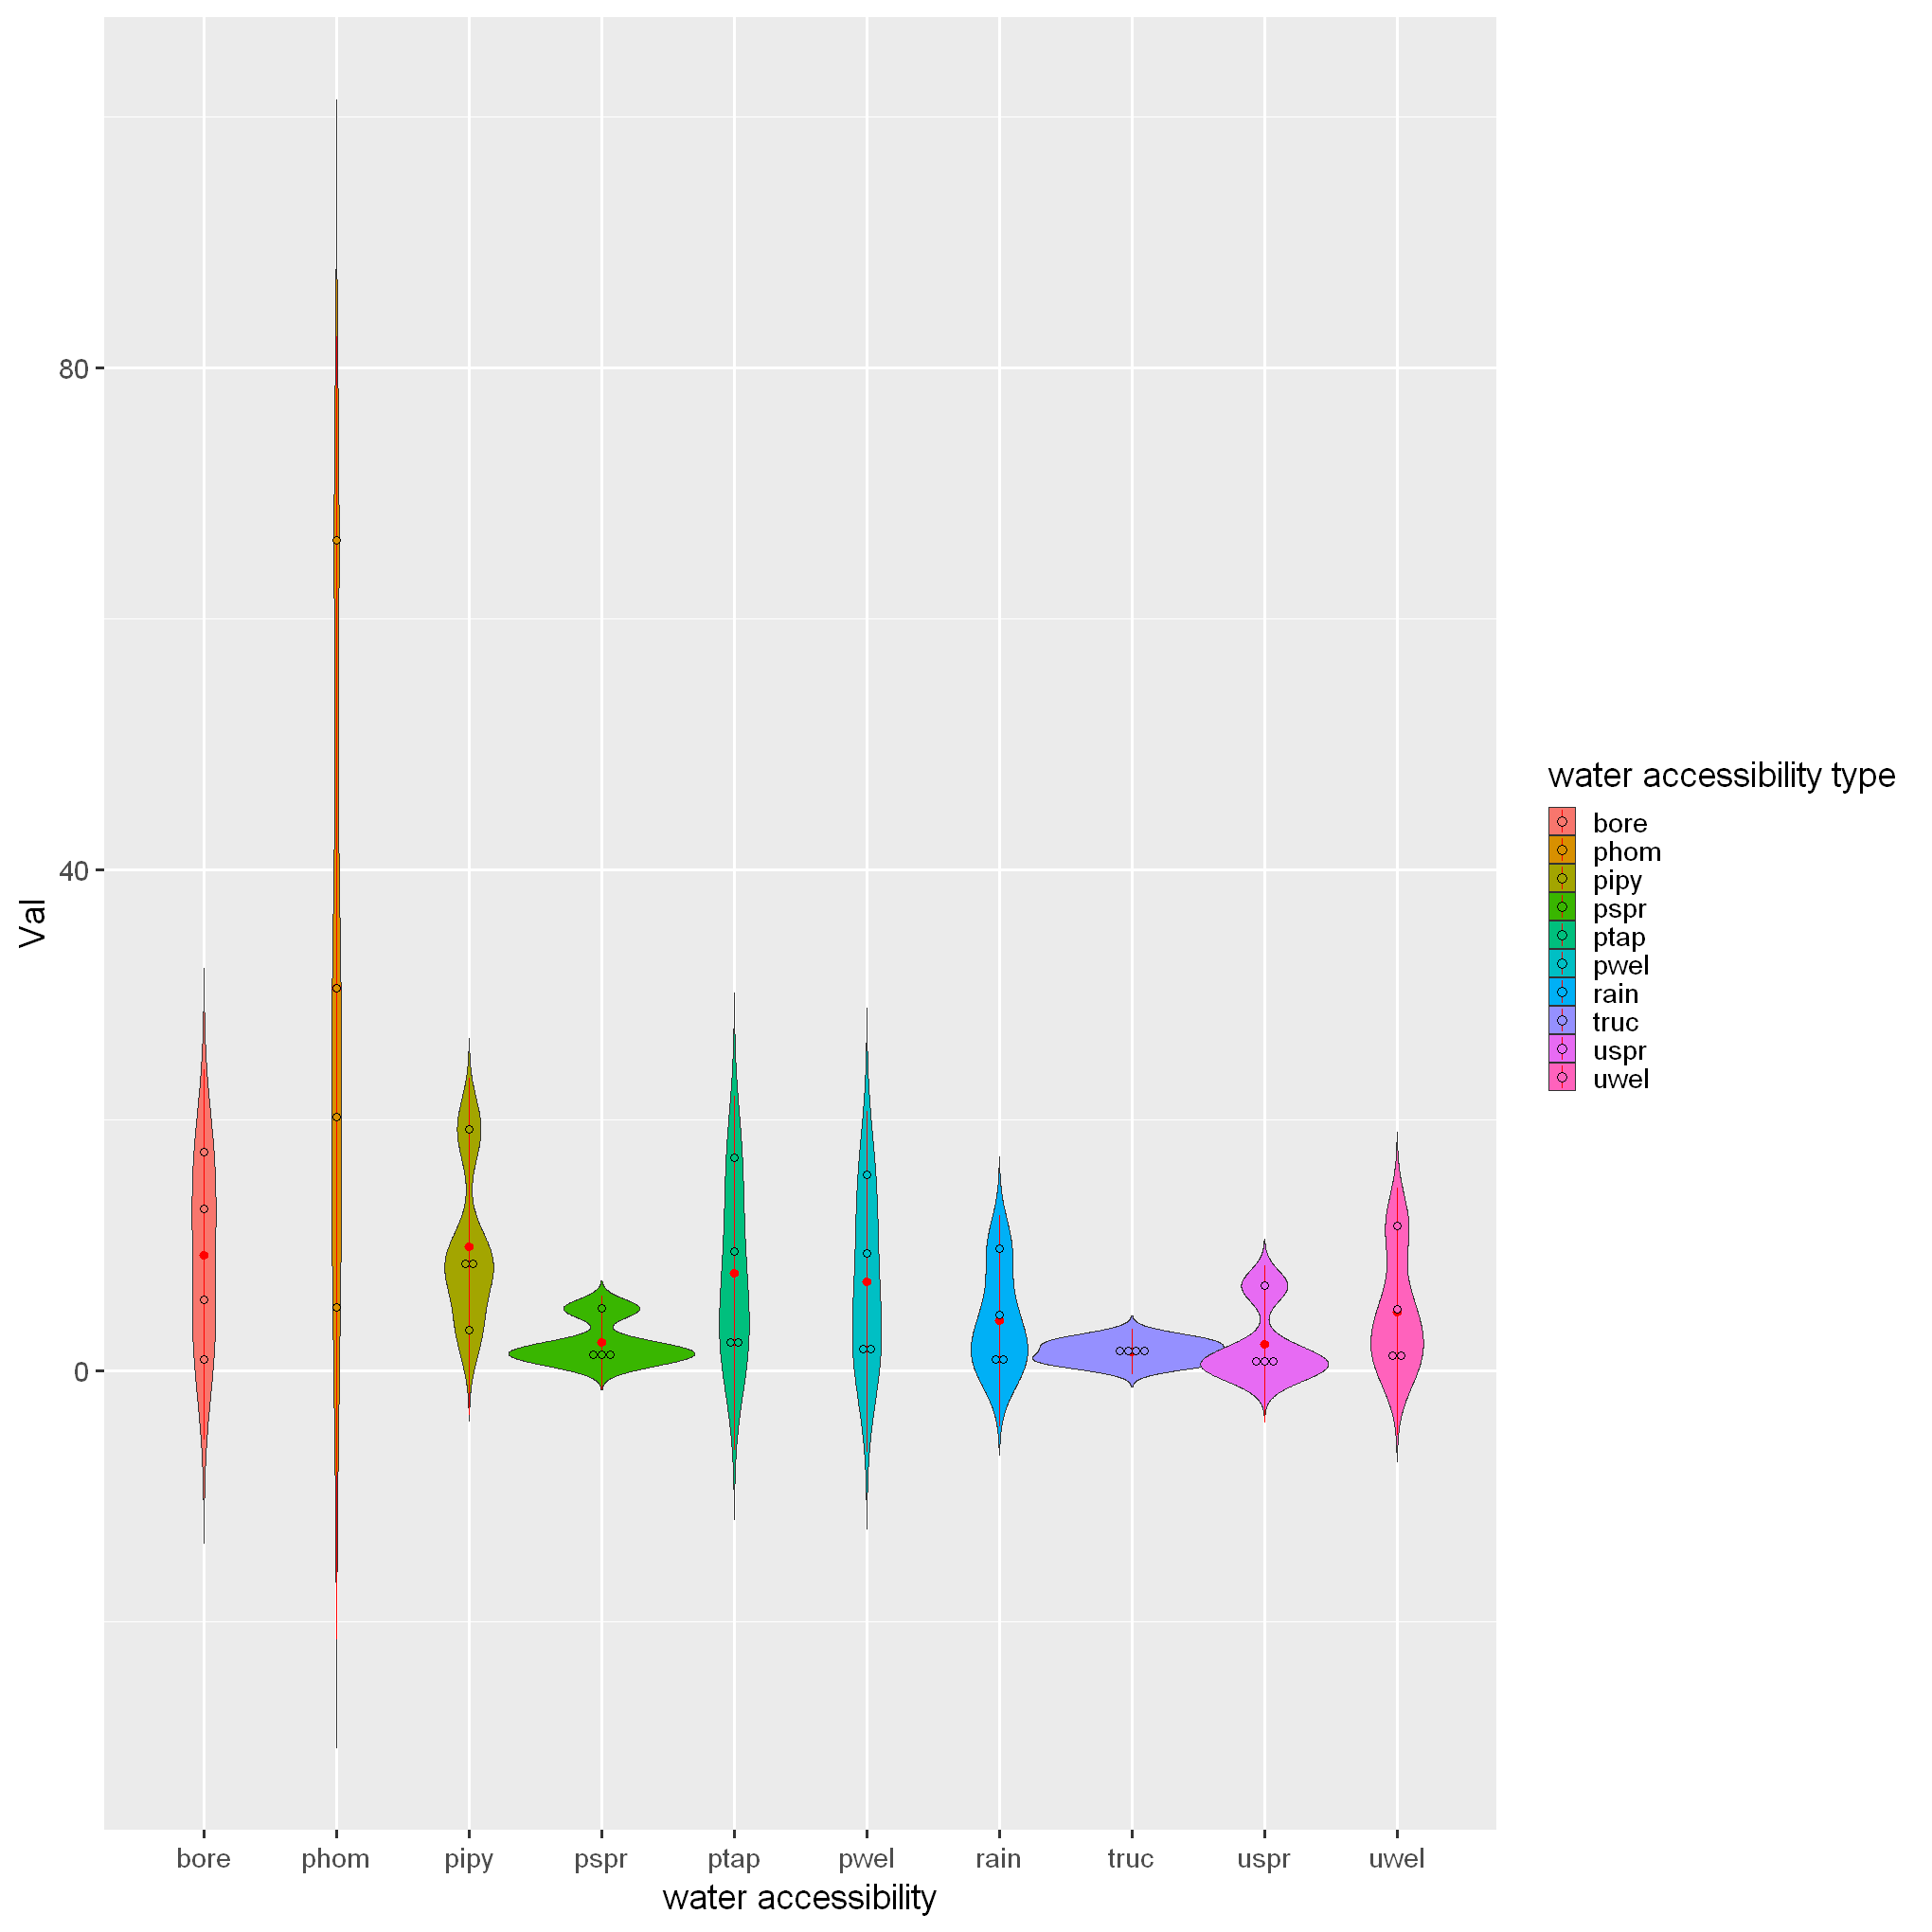

In [183]:
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:18]
df.wa.aggregate
rownames(df.wa.aggregate) <- c('A','B','C','D')

data_wa_one <- df.wa.aggregate[  ,1:10]

df.wa.aggregate <- as.factor(df.wa.aggregate[,])
sapply(df.wa.aggregate, class)


options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=5)

p <- data_wa_one %>% 
    gather(key="MesureType", value="Val") %>%
    ggplot( aes(x=MesureType, y=Val, fill=MesureType)) +
    geom_violin(trim=FALSE, width=1.5, size=.3) + 
    
    stat_summary(fun.data=mean_sdl, geom="pointrange", color="red") + 
    scale_color_brewer(palette="Dark2") +
    xlab('water accessibility') +
    geom_dotplot(binaxis='y', stackdir='center', dotsize=.3) +
    guides(fill =guide_legend("water accessibility type"))
p <- p + theme_grey(base_size = 22)
p 




phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.110811,9.089189,17.021622,17.48919,9.356757,4.975676,1.159459,11.545946,6.786486,1.018919,0.5486486,1.027027,0.3378378,7.740541,51.96757,16.762162,29.84595
66.212500,3.262500,1.350000,0.95000,0.762500,1.400000,0.637500,0.287500,0.187500,2.600000,0.1000000,18.362500,0.8500000,2.012500,8.45000,0.787500,90.48750
20.230435,19.278261,9.552174,12.93478,2.691304,1.956522,4.491304,2.126087,1.304348,1.934783,0.6913043,12.547826,0.5608696,2.930435,18.40435,3.473913,77.23913
30.560000,8.080000,3.280000,5.66000,15.660000,0.740000,9.780000,4.940000,0.260000,0.560000,0.5800000,3.360000,0.0800000,3.140000,0.00000,0.000000,0.00000


[1] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
 [9] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
[17] "factor"

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



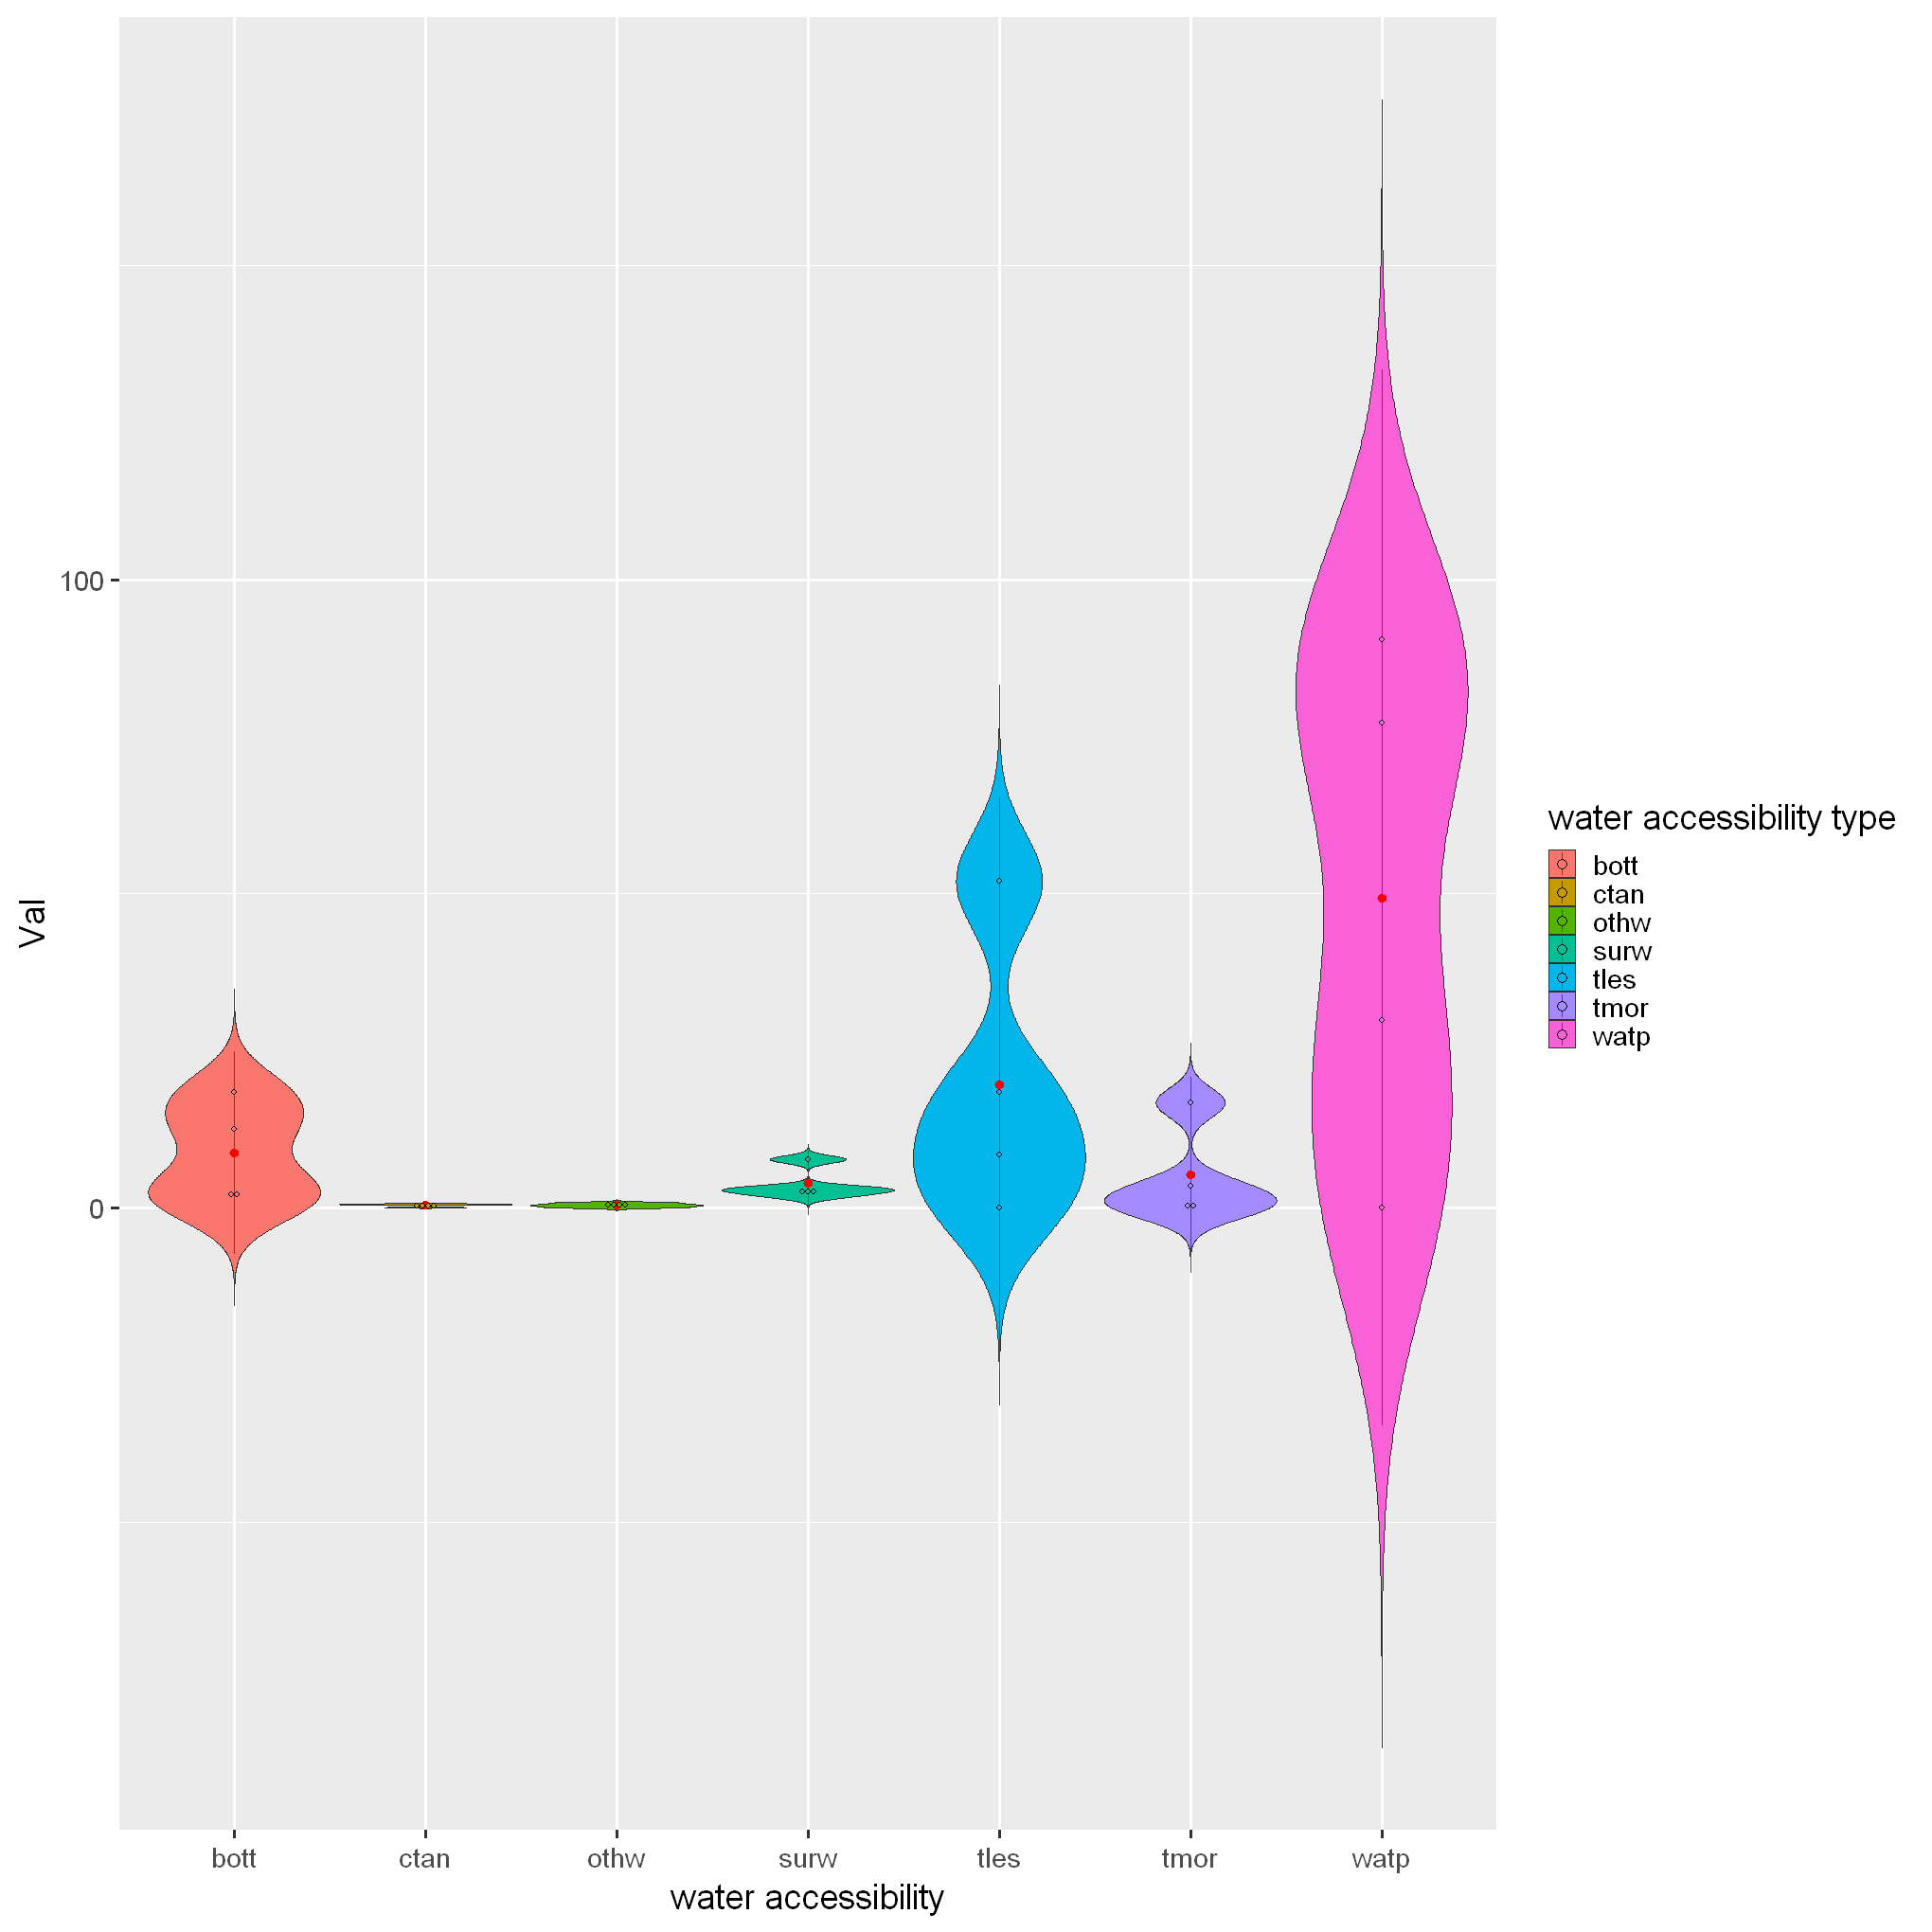

In [184]:
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:18]
df.wa.aggregate
rownames(df.wa.aggregate) <- c('A','B','C','D')

data_wa_one <- df.wa.aggregate[  , 11:17]

df.wa.aggregate <- as.factor(df.wa.aggregate[,])
sapply(df.wa.aggregate, class)


options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=5)

p <- data_wa_one %>% 
    gather(key="MesureType", value="Val") %>%
    ggplot( aes(x=MesureType, y=Val, fill=MesureType)) +
    geom_violin(trim=FALSE, scale = "width"  , size=.3, adjust = .75) + 
    stat_summary(fun.data=mean_sdl, geom="pointrange", color="red") + 
    scale_color_brewer(palette="Dark2") +
    xlab('water accessibility') +
    geom_dotplot(binaxis='y', stackdir='center', dotsize=.3) +
    guides(fill =guide_legend("water accessibility type"))
p <- p + theme_grey(base_size = 22)
p 




# Country's Centroids Rankings Demo

phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp,clusters
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3,1
48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9,2
4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5,1
88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6,2
34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9,3
4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5,3
5.1,4.2,13.0,28.9,4.4,0.3,0.4,20.8,1.2,0.2,0.3,0.0,0.4,5.8,49.8,12.1,37.4,1
24.6,54.1,5.3,0.0,1.7,0.0,0.0,6.2,0.0,1.7,0.0,0.0,0.9,5.2,11.2,0.7,88.0,3
2.6,9.6,18.4,40.6,9.0,0.2,0.0,16.3,1.5,0.0,0.2,0.2,0.5,0.8,49.8,32.6,17.1,1



 1  2  3  4 
37  8 23  5 

clusters,phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.110811,9.089189,17.021622,17.48919,9.356757,4.975676,1.159459,11.545946,6.786486,1.018919,0.5486486,1.027027,0.3378378,7.740541,51.96757,16.762162,29.84595
2,66.212500,3.262500,1.350000,0.95000,0.762500,1.400000,0.637500,0.287500,0.187500,2.600000,0.1000000,18.362500,0.8500000,2.012500,8.45000,0.787500,90.48750
3,20.230435,19.278261,9.552174,12.93478,2.691304,1.956522,4.491304,2.126087,1.304348,1.934783,0.6913043,12.547826,0.5608696,2.930435,18.40435,3.473913,77.23913
4,30.560000,8.080000,3.280000,5.66000,15.660000,0.740000,9.780000,4.940000,0.260000,0.560000,0.5800000,3.360000,0.0800000,3.140000,0.00000,0.000000,0.00000


clusters      phom      pipy      ptap      bore      pwel      pspr      rain 
 "factor" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
     uwel      uspr      truc      ctan      bott      othw      surw      tles 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
     tmor      watp 
"numeric" "numeric"

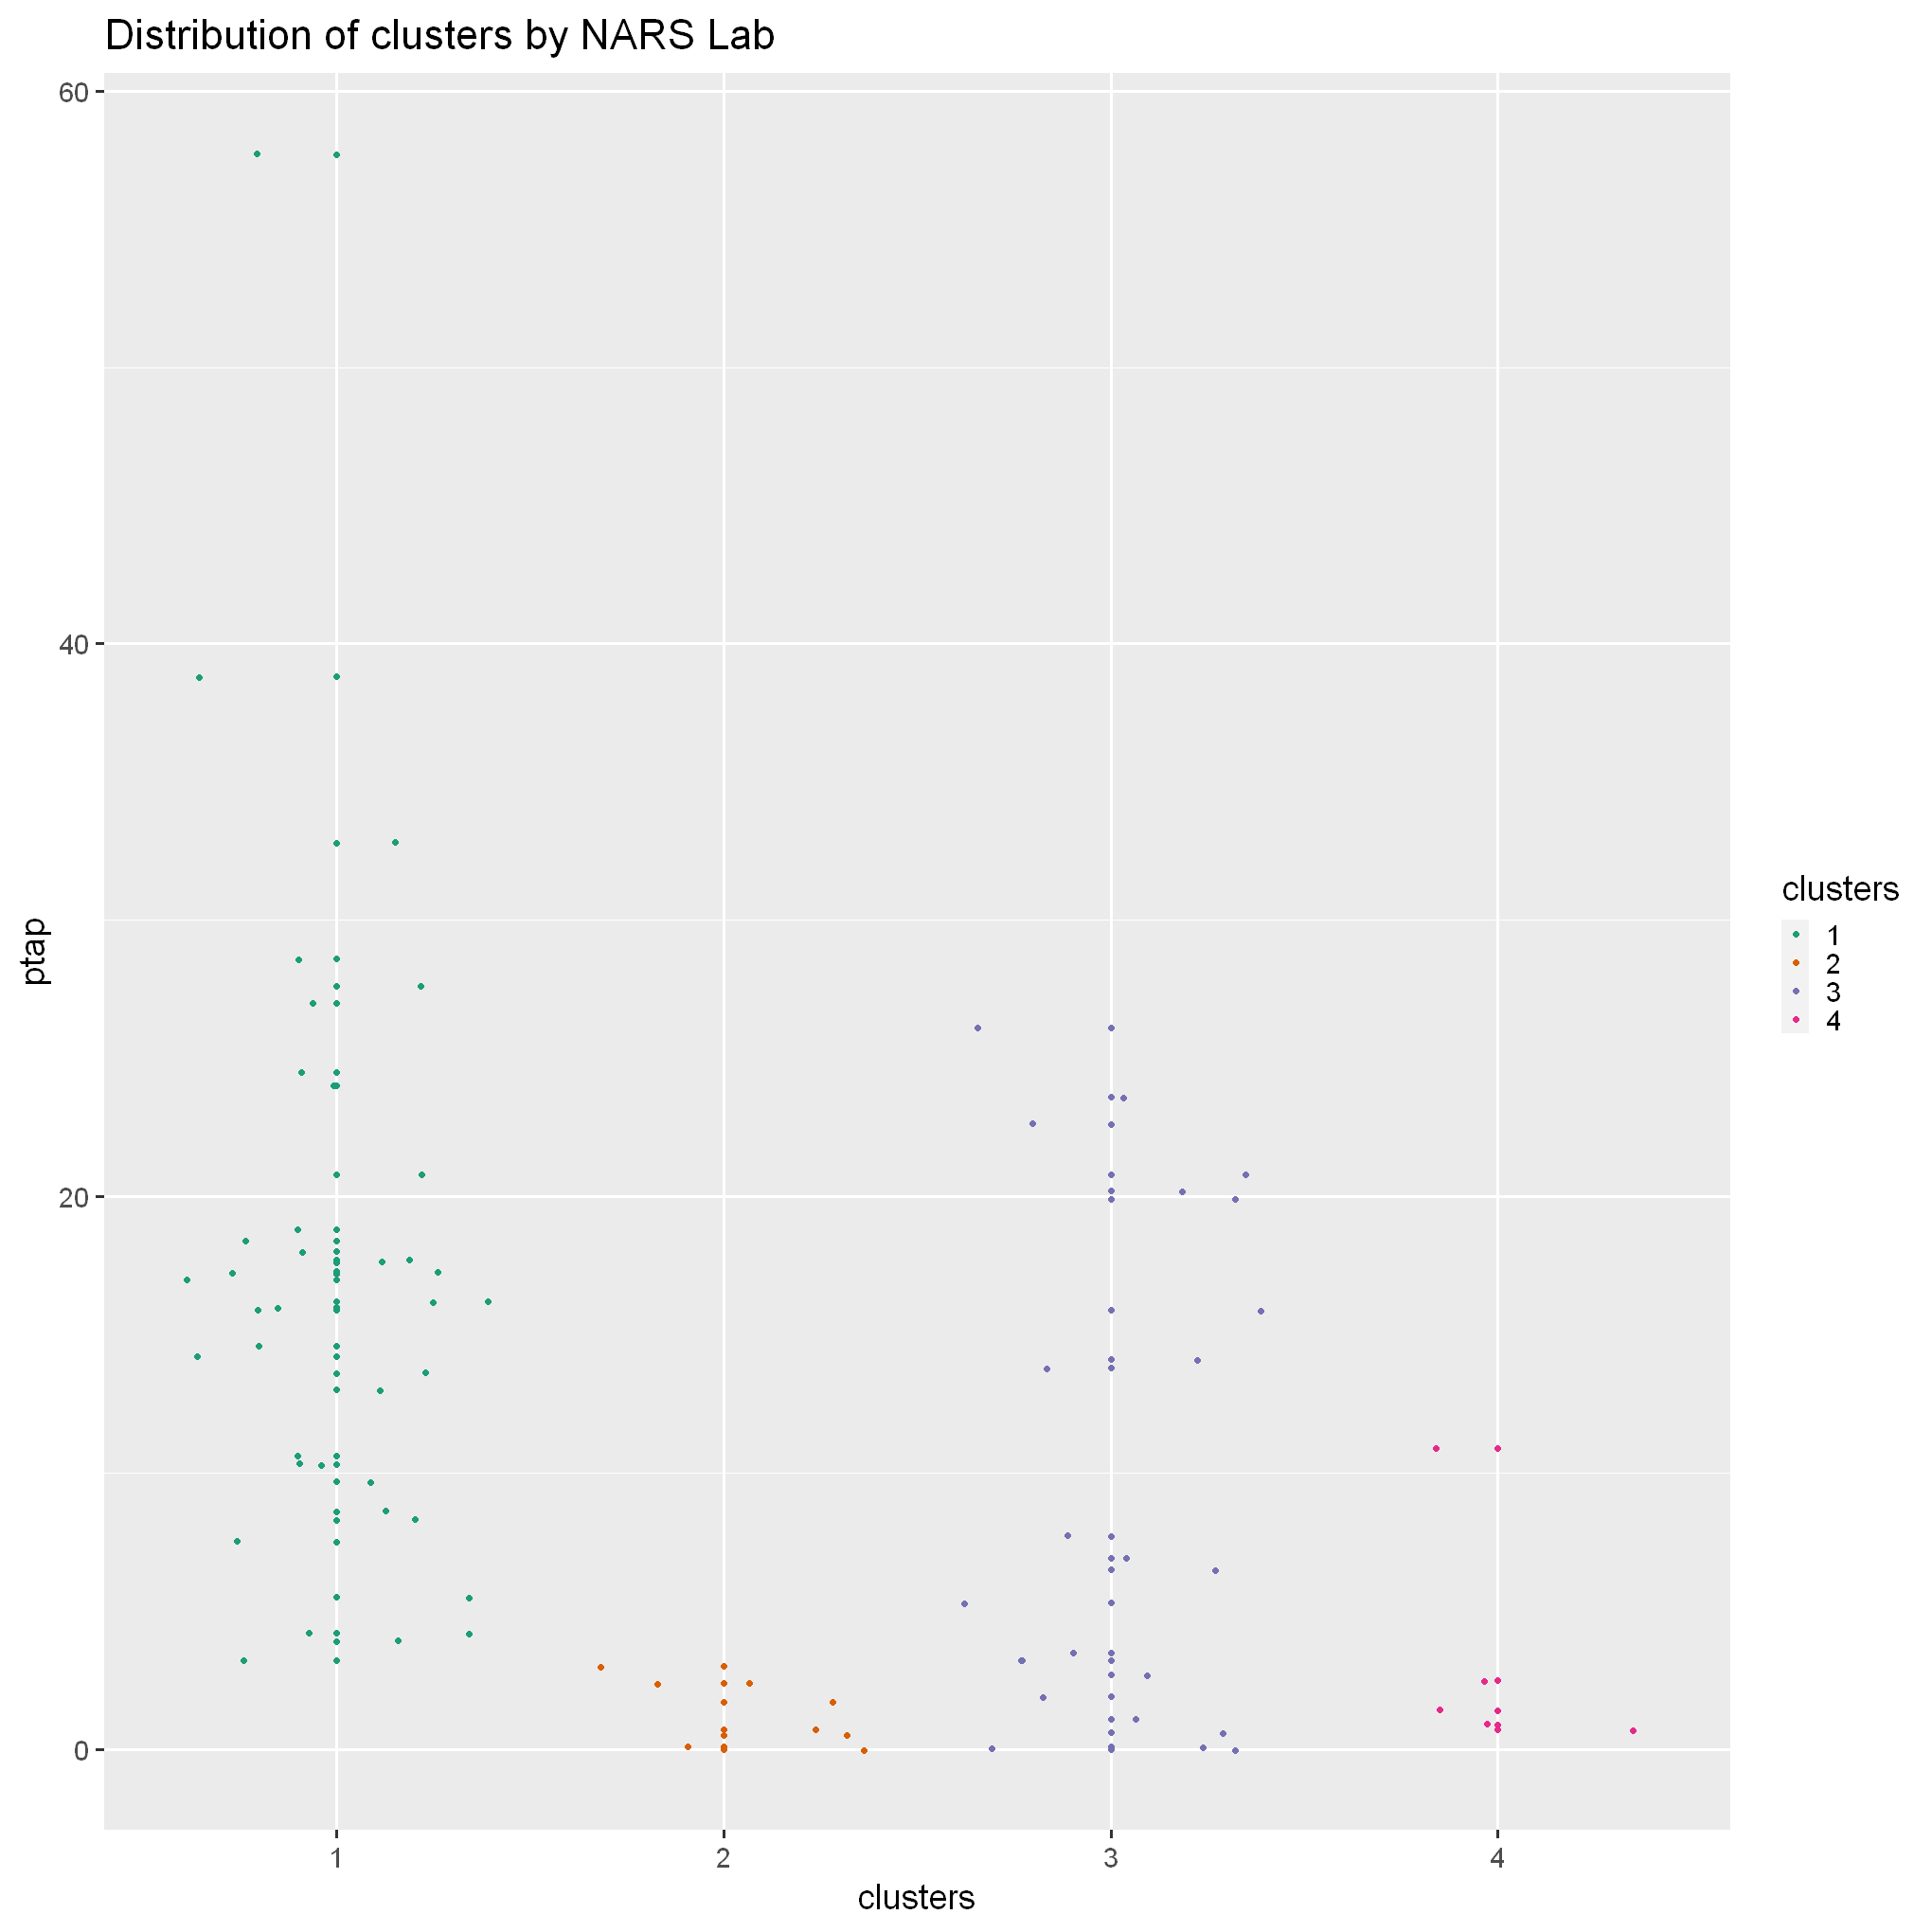

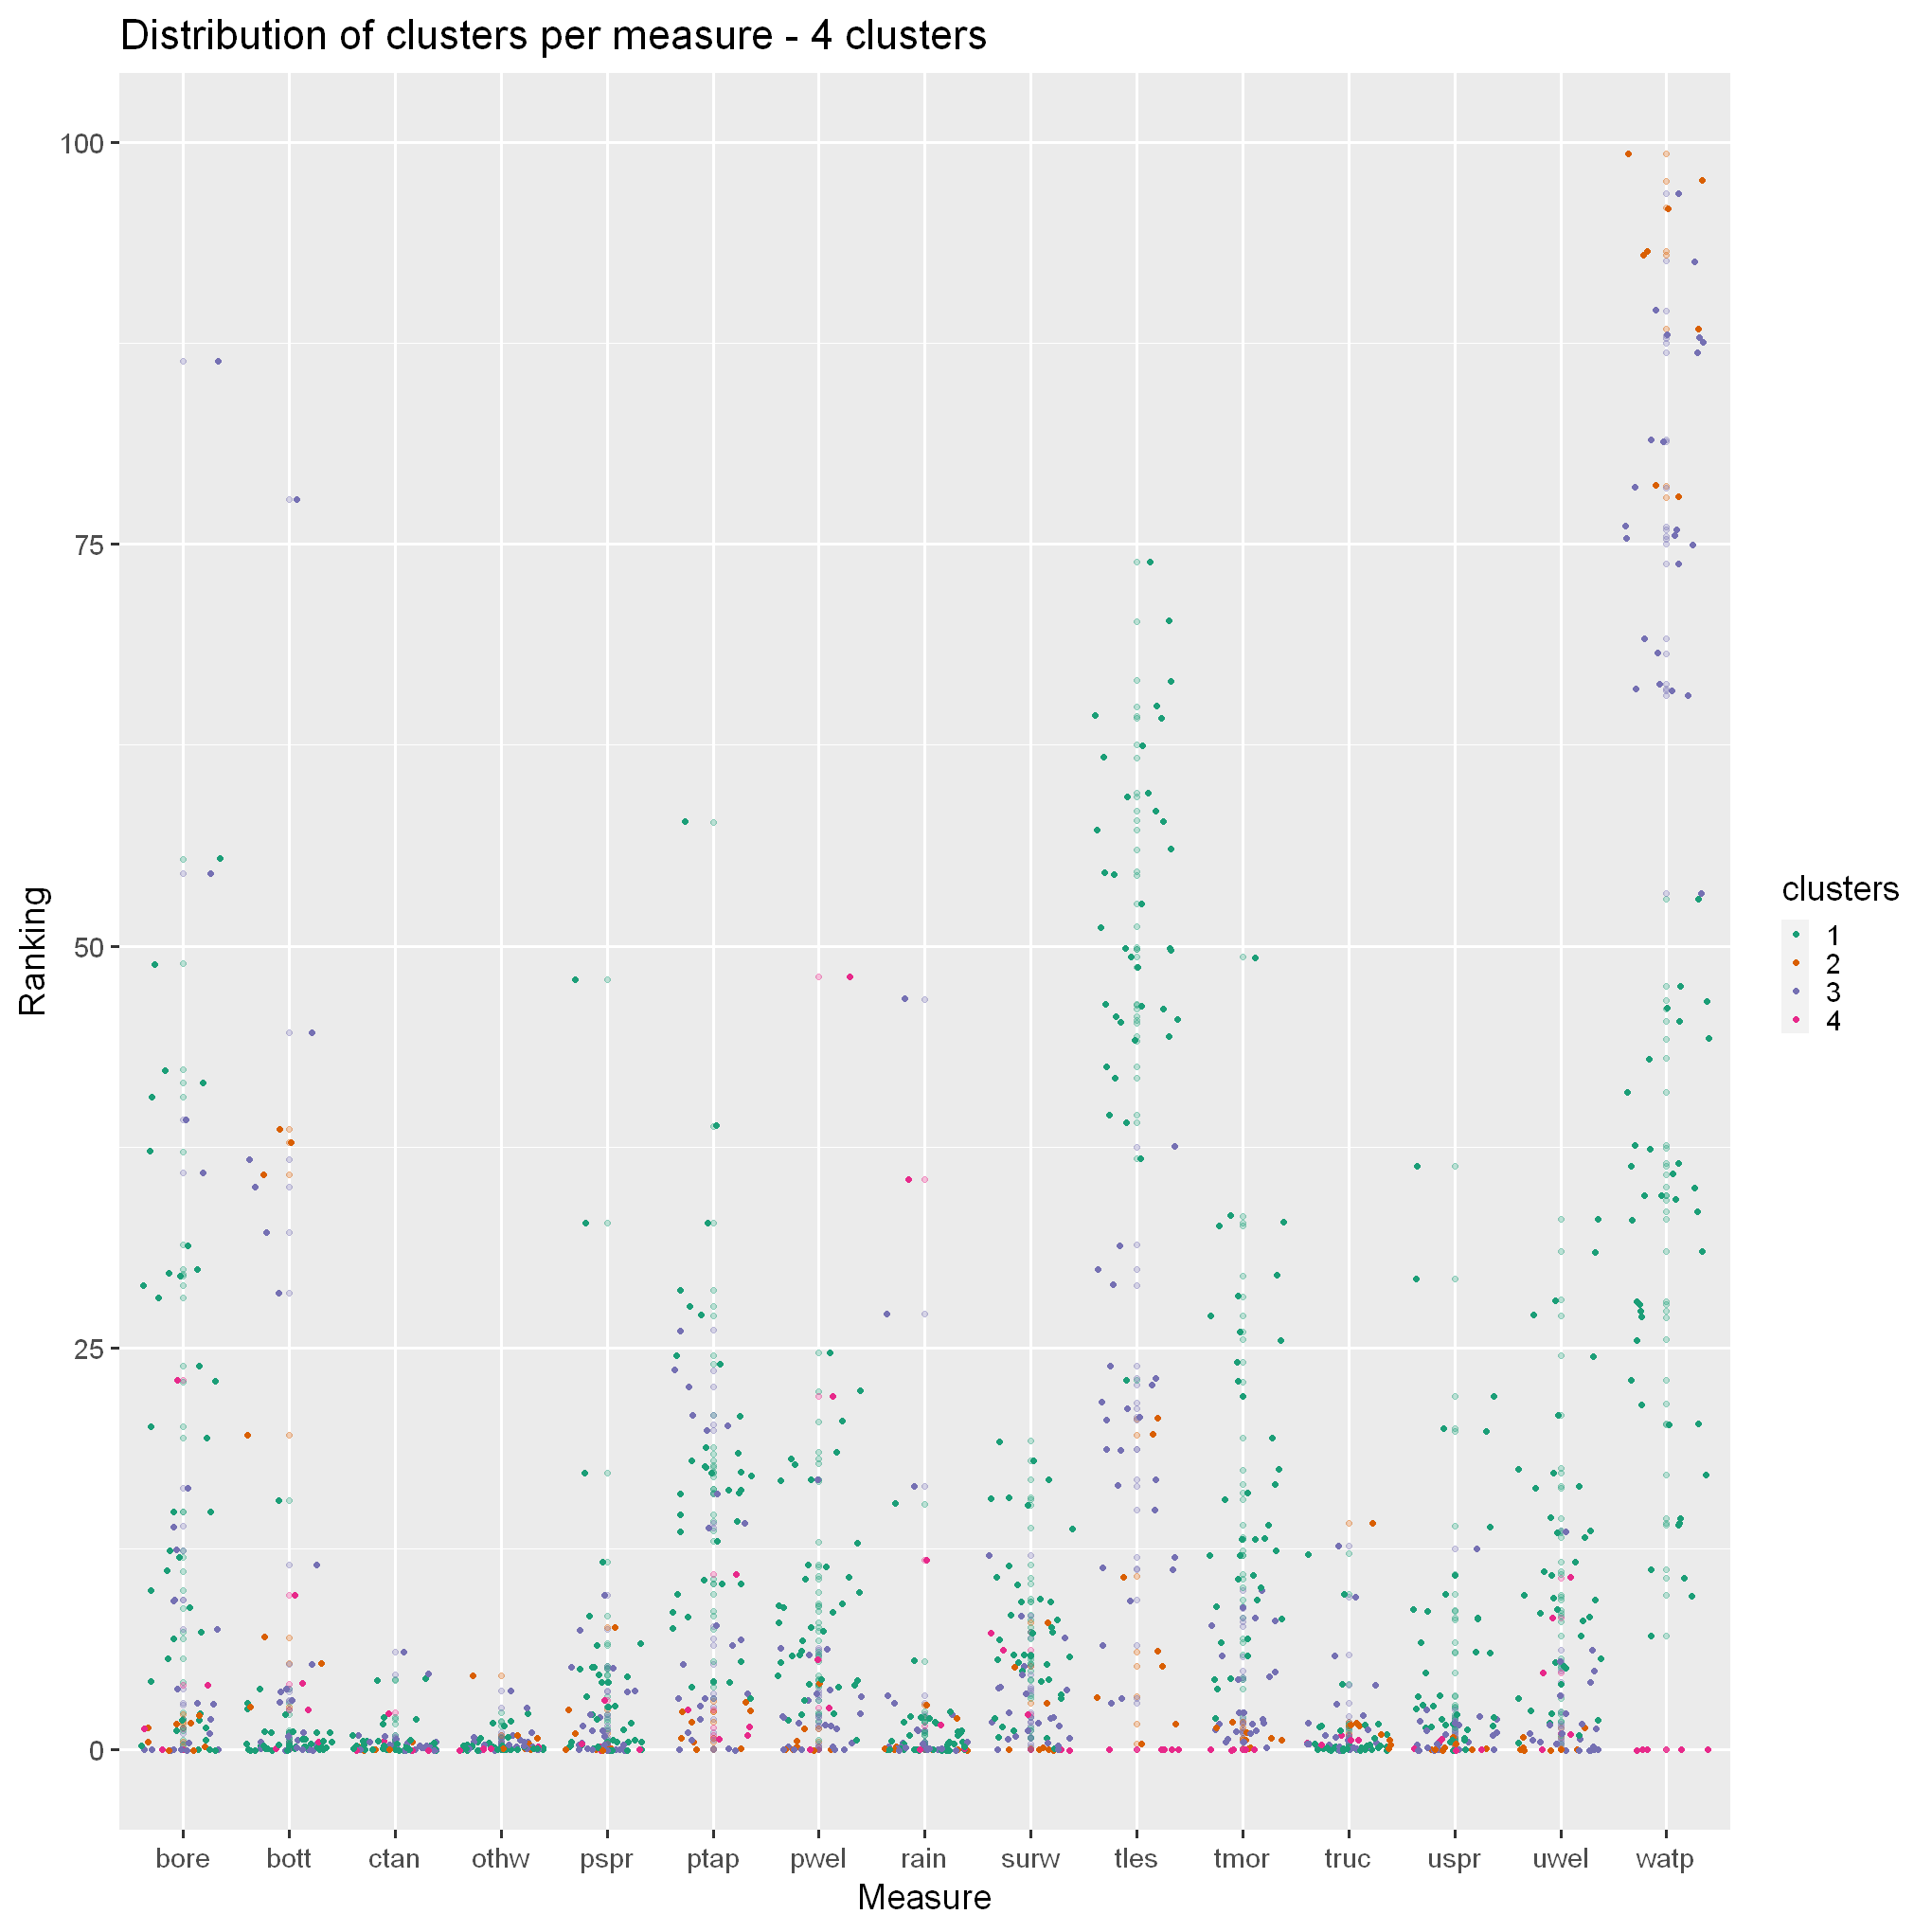

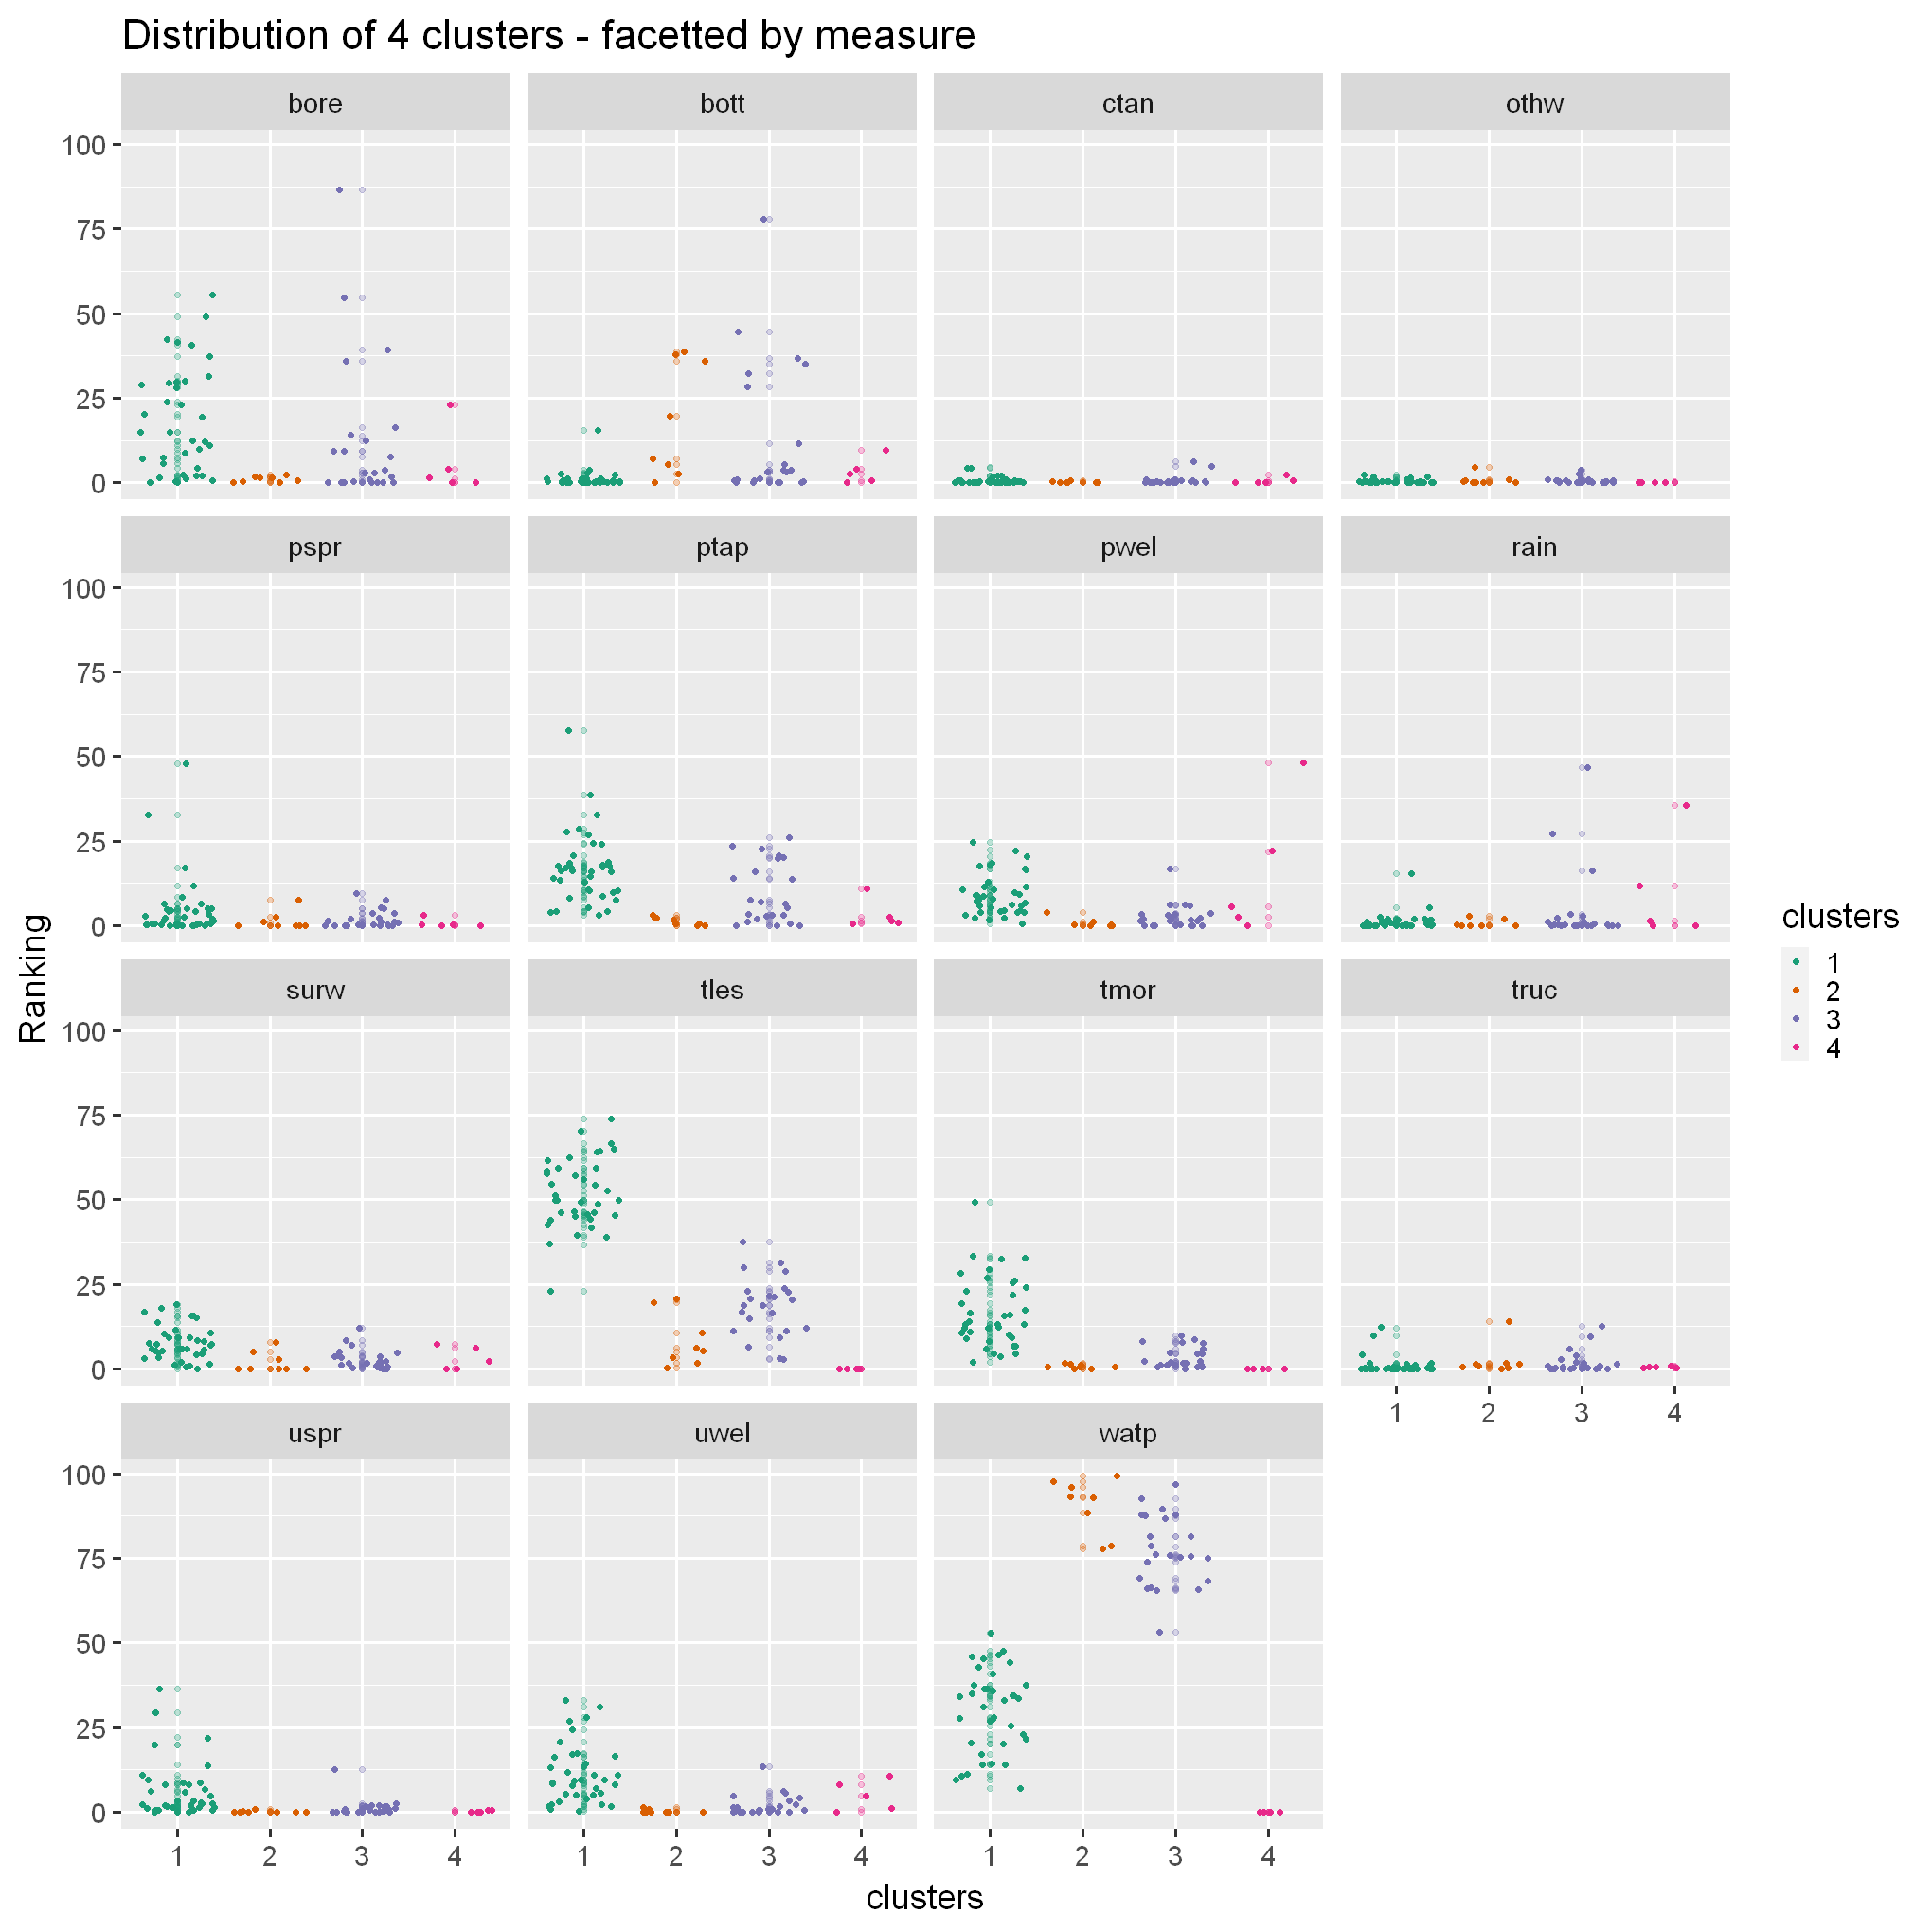

In [221]:
#data_wa$cluster <- cutree(hc.ward2,4) 
df.wa 
hc.ward2=hclust(dist(df.wa), method ="ward.D2")
df.wa$clusters <- cutree(hc.ward2,4)
df.wa$clusters <- as.factor(df.wa$clusters)

p <- ggplot(df.wa, aes(clusters, ptap, color = clusters, fill = clusters)) +
  geom_point(alpha = 0.6) +
  geom_jitter() +
  geom_point() +
  ggtitle("Distribution of clusters by NARS Lab") +
  scale_color_manual(values=c("#1B9E77" ,"#D95F02" ,"#7570B3" ,"#E7298A")) 
p <- p + theme_grey(base_size = 22) 
p 

table(df.wa$clusters)

#Group by the cluster assignment and calculate averages
df4_clus_avg <- df.wa %>%
  group_by(clusters) %>%
  summarize_if(is.numeric, mean, na.rm=TRUE)


head(df4_clus_avg,7) 

sapply(df4_clus_avg, class)
#Create a parallel coordinate plot of the values:
ggparcoord <- ggparcoord(df3_clus_avg, columns = c(2:18), 
           groupColumn = "clusters", scale = "globalminmax", order = "skewness") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) + geom_point(color = "#00AFBB") 
    
#make a dot plot
countries4_gathered <- df.wa %>% gather(Measure, Ranking, ptap:watp) 

g <- ggplot(countries4_gathered, aes(Measure, Ranking, color = clusters )) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of clusters per measure - 4 clusters") 
   
g <- g + theme_grey(base_size = 22) +  scale_color_manual(values=c("#1B9E77" ,"#D95F02" ,"#7570B3" ,"#E7298A")) 
g 
countries4_gathered %>% 

ggplot(aes(clusters, Ranking, col = clusters)) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of 4 clusters - facetted by measure") +
  facet_wrap(~Measure) +
 theme_grey(base_size = 22) +  
scale_color_manual(values=c("#1B9E77" ,"#D95F02" ,"#7570B3" ,"#E7298A"))
# set the set factor as for the clusters


# Rank Countries

In [187]:
df = read_excel( "../../results/df-water-access.xlsx")
count(df)

n
<int>
73


In [189]:
head(df,7) # clean df at next save (2 cluster columns - only 1 needed; etc) #df also needs to be only water accessibility variables

Country,phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3
Albania,48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9
Angola,4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5
Armenia,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6
Azerbaijan,34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9
Bangladesh,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5
Benin,5.1,4.2,13.0,28.9,4.4,0.3,0.4,20.8,1.2,0.2,0.3,0.0,0.4,5.8,49.8,12.1,37.4


In [191]:
df["norm"] <- apply(df[2:18], 1, function(x) sqrt(sum(x^2)) ) #assuming columns 5:10 are the water accessibility variables
# Ideally, df should just be the countries and the water access. variables ONLY. This, way, the code should then be:
# df["norm"] <- apply(df, 1, function(x) sqrt(sum(x^2)) )

In [192]:
df["distToCentroid"] = 0 # initialize

In [193]:
df.wa$clusters <- as.numeric(df.wa$clusters)
head(df.wa)
#Turn into numeric to find centroids

phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp,clusters
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3,1
48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9,2
4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5,1
88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6,2
34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9,3
4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5,3


In [195]:
# assuming centroiddf.wa is your vector of cluster centroids

# copied this from your earlier notebook
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,1:18]
centroiddf.wa <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster

head(centroiddf.wa)       
                       
                       
df$clusters <- dfsimple$clusters                      
head(df,7)

[1]  70.23646 114.07569  87.02403  38.02239

Country,phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,...,ctan,bott,othw,surw,tles,tmor,watp,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,...,4.4,0.2,1.7,7.3,45.2,8.2,45.3,73.72822,0,1
Albania,48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,...,0.2,19.6,0.1,0.0,20.6,1.1,77.9,97.55788,0,2
Angola,4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,...,4.3,1.2,1.8,18.0,46.1,15.6,34.5,66.41446,0,1
Armenia,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,...,0.0,0.0,0.0,0.0,1.6,0.1,97.6,131.88180,0,2
Azerbaijan,34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,...,0.7,0.1,1.1,7.0,18.7,4.4,75.9,89.49631,0,3
Bangladesh,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,...,0.1,0.3,0.1,1.2,22.7,1.6,75.5,117.14064,0,3
Benin,5.1,4.2,13.0,28.9,4.4,0.3,0.4,20.8,1.2,...,0.3,0.0,0.4,5.8,49.8,12.1,37.4,74.57003,0,1


In [196]:
# Then here, you compute the distance to centroid cluster by cluster
df[df$clusters == 1, "distToCentroid"] = abs(df[df$clusters == 1, "norm"] - centroiddf.wa[1])
df[df$clusters == 2, "distToCentroid"] = abs(df[df$clusters == 2, "norm"] - centroiddf.wa[2])
df[df$clusters == 3, "distToCentroid"] = abs(df[df$clusters == 3, "norm"] - centroiddf.wa[3])
df[df$clusters == 4, "distToCentroid"] = abs(df[df$clusters == 4, "norm"] - centroiddf.wa[4])
                       

head(df)
write_xlsx(df , '../../results/dfcluster-rank.xlsx')

Country,phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,...,ctan,bott,othw,surw,tles,tmor,watp,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,...,4.4,0.2,1.7,7.3,45.2,8.2,45.3,73.72822,3.491762,1
Albania,48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,...,0.2,19.6,0.1,0.0,20.6,1.1,77.9,97.55788,16.517814,2
Angola,4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,...,4.3,1.2,1.8,18.0,46.1,15.6,34.5,66.41446,3.821999,1
Armenia,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,...,0.0,0.0,0.0,0.0,1.6,0.1,97.6,131.88180,17.806109,2
Azerbaijan,34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,...,0.7,0.1,1.1,7.0,18.7,4.4,75.9,89.49631,2.472284,3
Bangladesh,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,...,0.1,0.3,0.1,1.2,22.7,1.6,75.5,117.14064,30.116613,3


In [197]:
# You can then sort each subset by the size of "distToCentroid"
df %>% 
  arrange_at("Country", desc) %>%
  arrange_at("distToCentroid") %>%
  select(1, 20, 21)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Congo,0.2003221,1
Gabon,0.3490033,3
India,0.6138628,3
Ghana,0.6760962,1
Kenya,1.2725648,1
Mozambique,1.4278079,1
Ethiopia,1.5202166,1
Tajikistan,1.8581406,3
Eritrea,1.8724204,1


In [198]:
#Cluster 1
df %>%
  filter(clusters == 1) %>%
  select(Country) %>%
  head(7)

Country
<chr>
Afghanistan
Angola
Benin
Burkina Faso
Burundi
Cameroon
Chad


In [199]:
#Cluster 2
df %>%
  filter(clusters == 2) %>%
  select(Country) %>%
  head(7)

Country
<chr>
Albania
Armenia
Colombia
Egypt
Honduras
Jordan
Peru


In [200]:
#Cluster 3
df %>%
  filter(clusters == 3) %>%
  select(Country) %>%
  head(7)

Country
<chr>
Azerbaijan
Bangladesh
Bolivia
Comoros
Dominican Republic
Gabon
Guatemala


In [201]:
#Cluster 4
df %>%
  filter(clusters == 4) %>%
  select(Country) %>%
  head(7)

Country
<chr>
Cambodia
Moldova
Morocco
Ukraine
Vietnam


In [202]:
# You can then sort each subset by the size of "distToCentroid"
df1 = df %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1, 20, 21)



In [205]:
head(df1)
cluster.one <- subset(df1, clusters == 1 )
cluster.two <- subset(df1, clusters == 2 )
cluster.three <- subset(df1, clusters == 3 )
cluster.four <- subset(df1, clusters == 4 )
head(cluster.one)
summary(cluster.one)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Congo,0.2003221,1
Ghana,0.6760962,1
Kenya,1.2725648,1
Mozambique,1.4278079,1
Ethiopia,1.5202166,1
Eritrea,1.8724204,1


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Congo,0.2003221,1
Ghana,0.6760962,1
Kenya,1.2725648,1
Mozambique,1.4278079,1
Ethiopia,1.5202166,1
Eritrea,1.8724204,1


   Country          distToCentroid       clusters
 Length:37          Min.   : 0.2003   Min.   :1  
 Class :character   1st Qu.: 3.3335   1st Qu.:1  
 Mode  :character   Median : 6.2890   Median :1  
                    Mean   : 7.7584   Mean   :1  
                    3rd Qu.:10.0395   3rd Qu.:1  
                    Max.   :23.0948   Max.   :1  

In [206]:
cluster.one %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.two %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.three %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.four %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
   arrange_at("clusters") %>%
 select(1:3)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Congo,0.2003221,1
Ghana,0.6760962,1
Kenya,1.2725648,1
Mozambique,1.4278079,1
Ethiopia,1.5202166,1
Eritrea,1.8724204,1
Eswatini,2.7756667,1
Guinea,3.1241606,1
Zimbabwe,3.2670137,1


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Turkey,2.195446,2
Peru,5.467730,2
Jordan,6.635614,2
Honduras,7.692613,2
Colombia,11.775567,2
Egypt,16.124882,2
Albania,16.517814,2
Armenia,17.806109,2


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Gabon,0.3490033,3
India,0.6138628,3
Tajikistan,1.8581406,3
Kyrgyz Republic,2.1023424,3
Nepal,2.2355928,3
Azerbaijan,2.4722842,3
Senegal,2.5813284,3
Nicaragua,3.8576527,3
Yemen,4.0493484,3


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Cambodia,7.823435,4
Vietnam,13.605596,4
Moldova,19.229419,4
Morocco,22.516272,4
Ukraine,22.871941,4


# World Map

In [207]:
df = read_excel('../../results/dfcluster-rank.xlsx') #change name of file to sth descriptive (e.g. country-clusters)
head(df)

Country,phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,...,ctan,bott,othw,surw,tles,tmor,watp,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,...,4.4,0.2,1.7,7.3,45.2,8.2,45.3,73.72822,3.491762,1
Albania,48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,...,0.2,19.6,0.1,0.0,20.6,1.1,77.9,97.55788,16.517814,2
Angola,4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,...,4.3,1.2,1.8,18.0,46.1,15.6,34.5,66.41446,3.821999,1
Armenia,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,...,0.0,0.0,0.0,0.0,1.6,0.1,97.6,131.88180,17.806109,2
Azerbaijan,34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,...,0.7,0.1,1.1,7.0,18.7,4.4,75.9,89.49631,2.472284,3
Bangladesh,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,...,0.1,0.3,0.1,1.2,22.7,1.6,75.5,117.14064,30.116613,3


In [208]:
df = df[, c(1,21)] # select only country name and cluster number
head(df)

Country,clusters
<chr>,<dbl>
Afghanistan,1
Albania,2
Angola,1
Armenia,2
Azerbaijan,3
Bangladesh,3


In [209]:
colnames(df) = c('region', 'value') # change column names for ggplot
dim(df)
head(df)

[1] 73  2

region,value
<chr>,<dbl>
Afghanistan,1
Albania,2
Angola,1
Armenia,2
Azerbaijan,3
Bangladesh,3


In [210]:
# This is to convert country names in df to match those in the worldMap dataframe
coords <- joinCountryData2Map(df, joinCode = "NAME", nameJoinColumn = "region")
coords = data.frame(coords)
colnames(coords) = tolower(colnames(coords))
colnames(coords)
coords = drop_na(coords, value)
coords$name

71 codes from your data successfully matched countries in the map
2 codes from your data failed to match with a country code in the map
172 codes from the map weren't represented in your data


[1] "scalerank"    "labelrank"    "featurecla"   "sovereignt"   "sov_a3"      
 [6] "adm0_dif"     "level"        "type"         "admin"        "adm0_a3"     
[11] "geou_dif"     "geounit"      "gu_a3"        "su_dif"       "subunit"     
[16] "su_a3"        "name"         "abbrev"       "postal"       "name_forma"  
[21] "terr_"        "name_sort"    "map_color"    "pop_est"      "gdp_md_est"  
[26] "fips_10_"     "iso_a2"       "iso_a3"       "iso_n3"       "iso3"        
[31] "lon"          "lat"          "iso3.1"       "admin.1"      "region"      
[36] "continent"    "geo3major"    "geo3"         "image24"      "glocaf"      
[41] "stern"        "sresmajor"    "sres"         "gbd"          "avoidnumeric"
[46] "avoidname"    "ldc"          "sid"          "lldc"         "region"      
[51] "value"        "admin.2"      "iso3.2"

[1] Afghanistan           Angola                Albania              
 [4] Armenia               Azerbaijan            Burundi              
 [7] Benin                 Burkina Faso          Bangladesh           
[10] Bolivia               Ivory Coast           Cameroon             
[13] Congo (Brazzaville)   Colombia              Dominican Rep.       
[16] Egypt                 Eritrea               Ethiopia             
[19] Gabon                 Ghana                 Guinea               
[22] Gambia                Guatemala             Guyana               
[25] Honduras              Haiti                 Indonesia            
[28] India                 Jordan                Kenya                
[31] Kyrgyzstan            Cambodia              Liberia              
[34] Lesotho               Morocco               Moldova              
[37] Madagascar            Mali                  Myanmar              
[40] Mozambique            Mauritania            Malawi               
[43] Namibia               Niger                 Nigeria              
[46] Nicaragua             Nepal                 Pakistan             
[49] Peru                  Philippines           Papua New Guinea     
[52] Rwanda                Senegal               Sierra Leone         
[55] Chad                  Togo                  Tajikistan           
[58] Turkmenistan          East Timor            Turkey               
[61] Tanzania              Uganda                Ukraine              
[64] Vietnam               Yemen                 South Africa         
[67] Zambia                Zimbabwe              Comoros              
[70] Maldives              Sao Tome and Principe
243 Levels: Afghanistan Aland Albania Algeria American Samoa Andorra ... Zimbabwe

In [211]:
setdiff(df$region,coords$name)

[1] "Congo"                     "Congo Democratic Republic"
[3] "Cote d'Ivoire"             "Dominican Republic"       
[5] "Eswatini"                  "Kyrgyz Republic"          
[7] "Timor-Leste"

In [212]:
# Correct the country names in DF
df[df=='Timor-Leste'] = "East Timor"
df[df=='Central African Republic'] = "Central African Rep."
df[df=='Cote d\'Ivoire'] = "Ivory Coast"
df[df=='Dominican Republic'] = "Dominican Rep."
df[df=='Kyrgyz Republic'] = "Kyrgyzstan"
df[df=='Eswatini'] = "Swaziland"
df[df=='Congo'] = "Congo (Brazzaville)"
df[df=='Congo Democratic Republic'] = "Congo (Kinshasa)"

In [213]:
# Get world map data (lat/long)
countrynames = df$region
worldMap <- getMap()
country_indices <- which(worldMap$NAME%in%countrynames)

In [214]:
# Get coordinates for all countries to plot base map
allCoords <- lapply(seq(1,243), function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})
allCoords <- do.call("rbind", allCoords)


In [215]:
# Get coordinates strictly for those in water accessibility dataset
waterCoords <- lapply(country_indices, function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})

waterCoords <- do.call("rbind", waterCoords)
waterCoords$value <- df$value[match(waterCoords$region,df$region)]
waterCoords$value <- factor(waterCoords$value)

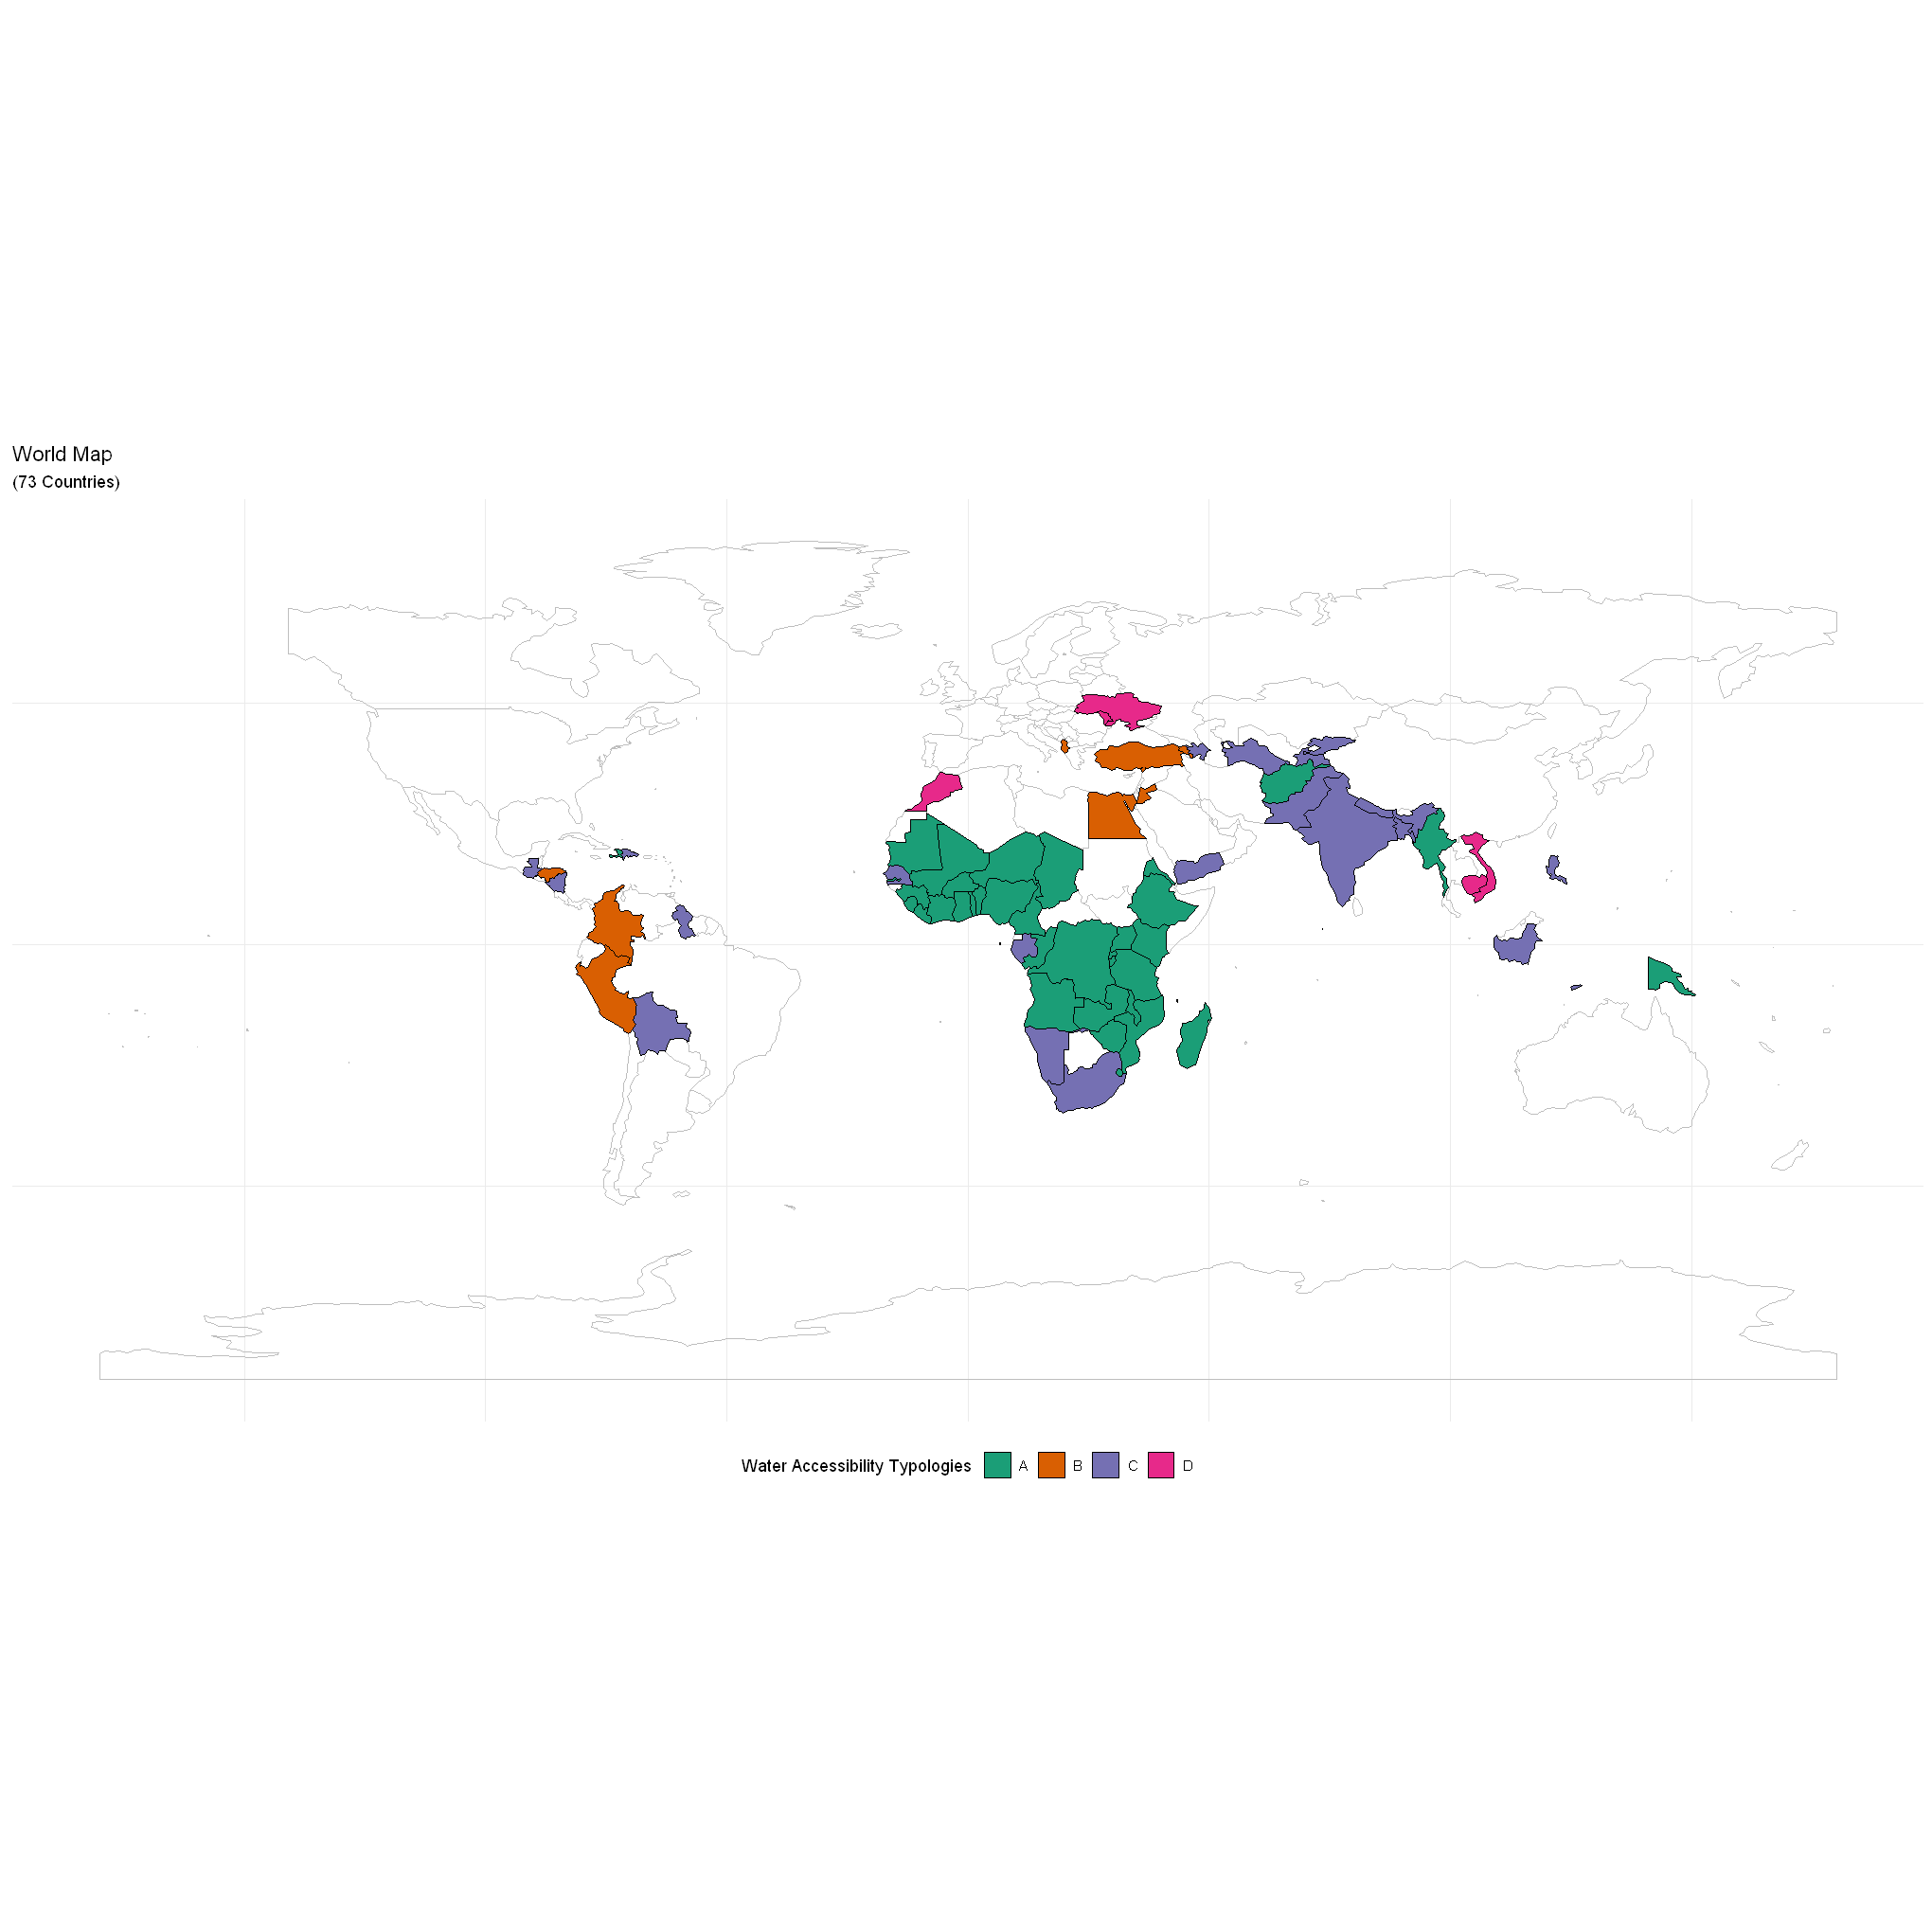

In [219]:
# Plot
options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1)
ggplot() +
    geom_sf(color = "black", fill= 'antiquewhite') +
    xlab("Longitude") + ylab("Latitude") +
    geom_polygon(data= allCoords, mapping = aes(x =long, y=lat,group = region),color="grey",fill=NA) + 
    geom_polygon( data = waterCoords, mapping = aes(x =long, y=lat,group = region, fill=value), size=.3,color="black") +
    expand_limits(x = waterCoords$long, y = waterCoords$lat)  + 
    scale_fill_brewer(palette='Dark2', name="Water Accessibility Typologies", na.value="grey", labels = c("A", "B", "C","D")) +  #labels = c())+
    ggtitle("World Map", subtitle = paste0("(", length(unique(df$region)), " Countries)")) +
    theme_minimal() +
    theme(legend.position = "bottom",
        axis.ticks = element_blank(), 
        axis.title = element_blank(), 
        axis.text =  element_blank()) 
#     #guides(fill = guide_colorbar(barwidth = 10, barheight = .5))


#Ref: https://egallic.fr/en/european-map-using-r/